# CS 109A/AC 209A/STAT 121A Data Science: Homework 8
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, November 16th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW8.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [64]:
import numpy as np
import pandas as pd
import scipy as sp

import pydotplus
from IPython.display import Image

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from inspect import getmembers

from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import tree
from sklearn import ensemble
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score as KFcv
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
import StringIO
from matplotlib import rcParams

from sklearn import linear_model
from sklearn import svm
import matplotlib

%matplotlib inline

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

Bassily, Hany

### Part (b): Course Number

CS E-109A

### Part (c): Who did you work with?

None

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Image Processing Revisited

In this problem we revisit applications of classification, with the purpose of comparing the performance of support vector classifiers with other classifiers we have learned. We'll begin with the aeriel vegetation detection problem from Homework #7.

The data is contained in `dataset_1.txt` and `dataset_2.txt` (you are encouraged to use the datasets from Homework #7 as well). The first two columns of the data contains the latitude and longitudes of randomly sampled locations in the satellite image, and the last column contains a label indicating whether the location contains vegetation (1 denotes the presence of vegetation and 0 denotes otherwise). The task is to, again, identify the vegetation regions in the image.

- Compare the result of using support vector classifiers to perform classification against results obtained from other models you have learned. Which model is more appropriate for the general task of vegetation detection in aerial images (do not restrict yourself to which model performs better on just these two datasets)? Which model is more appropriate for other types of image processing (hand-writting digit classification for example) Your comparison should be both **qualitative** and quantitative.

    **Hint:** For your analysis, it's vital to consider the differences between the ways in which each of these models perform classification. These differences can be gauged by looking at the differences between the decision boundaries drawn by the models and **how** these boundaries are determined. 
    
- Are there any obvious draw backs to support vector classifiers as we have presented them to you? What might be some intuitive ways to address these draw backs?

Again, we provide you with a function `plot_decision_boundary` to visualize the decision boundary of a classifier.

In [65]:
#--------  plot_decision_boundary
# A function that visualizes the data and the decision boundaries
# Input: 
#      x (predictors)
#      y (labels)
#      model (classifier)
#      poly_flag (fits quadratic model if true, otherwise linear)
#      title (title for plot)
#      ax (a set of axes to plot on)
# Returns: 
#      ax (axes with data and decision boundaries)

def plot_decision_boundary(x, y, model, title, ax, bounds=(0, 1), poly_flag=False , reg = False):
    # Plot data
    ax.scatter(x[y == 1, 0], x[y == 1, 1], c='green')
    ax.scatter(x[y == 0, 0], x[y == 0, 1], c='white')
    
    # Create mesh
    interval = np.arange(bounds[0], bounds[1], 0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)

    # Predict on mesh points
    if(poly_flag):
        quad_features = preprocessing.PolynomialFeatures(degree=2)
        xx = quad_features.fit_transform(xx)
        
    # Handling regression    
    if (reg):
        yy = model.predict(xx)
        
        # Apply categorization
        yy[yy >= 0.5] = 1.
        yy[yy < 0.5 ] = 0.
        
    else:
        yy = model.predict(xx)
        
    yy = yy.reshape((n, n))

    # Plot decision surface
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    ax.contourf(x1, x2, yy, alpha=0.1, cmap='Greens')
    
    # Label axes, set title
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
   
    return ax

---

<font color = 'blue'>
### Solution:
</font>
<br>

The solution for this problem will follow the following startegy:

 1. Load data and make a data scatter for all vegetation data sets (including HW7)
 2.	Visualize decision boundaries for all models and all data
 3.	For support vector machine:
  -	Identify the support vectors for both data sets(training) and fit a svc model only to the support vectors
  -	Parameter tuning for svc and fit test data
 4.	Quantitative comparison between SVM and other linear models (accuracy, f1 score, false negatives ratio, false positives ratio)
 5.	Comparison between different methods
  -	Data characteristics: Number of features, class labels, availability of training data, categorical data,     decision boundary shape, class separability
  -	Suitability of each model: Number of features limitations, size of data, Training cost, prediction cost, class separability, classification cost, number of labels, handling of categorical predictors, interpretability
 6. Shortcomings of SVM
 7. Test with other kernels


<br>
In this analysis and for the sake of consistency in the comparison with the support vector classifier, we will consider for point 1 to 6 above the linear models which are linear regression , logistic regression and LDA. The non linear models along with the quadratic and higher orders forms of the above models will not be considered to keep a common and consistent criteria for the comparison between the different models performance and it is also important to have one form (linear) of the decision boundary as a basis for comparison.



<br>

**1. Load Datasets and Visualize:**


<br>


In [66]:
# Opening Data sets:
# ------------------

# First file
sat_img_1 = pd.read_csv('datasets/dataset_1_train.txt', delimiter=',', header=None)
print 'file opened: datasets/dataset_1_train.txt'

# Second File
sat_img_2 = pd.read_csv('datasets/dataset_2_train.txt', delimiter=',', header=None)
print 'file opened: datasets/dataset_2_train.txt'

# Third file HW7
sat_img_3 = pd.read_csv('datasets/dataset_1_test.txt', delimiter=',', header=None)
print 'file opened: datasets/dataset_1_test.txt'

# Fourth file HW7
sat_img_4 = pd.read_csv('datasets/dataset_2_test.txt', delimiter=',', header=None)
print 'file opened: datasets/dataset_2_test.txt'

# Fifth file HW7
sat_img_5 = pd.read_csv('datasets/dataset_17.txt', delimiter=',', header=None)
print 'file opened: datasets/dataset_17.txt'

# Sixth file HW7
sat_img_6 = pd.read_csv('datasets/dataset_27.txt', delimiter=',', header=None)
print 'file opened: datasets/dataset_27.txt'

# First file Test
sat_img_7 = pd.read_csv('datasets/dataset_37.txt', delimiter=',', header=None)
print 'file opened: datasets/dataset_37.txt'

# Second file Test
sat_img_8 = pd.read_csv('datasets/dataset_47.txt', delimiter=',', header=None)
print 'file opened: datasets/dataset_47.txt'

# Make a list of the four dataframes so we can iterate through them later
sat_images = [sat_img_1, sat_img_2, sat_img_3, sat_img_4, sat_img_5, sat_img_6, sat_img_7, sat_img_8]

# Sanity check
print '\n Sample from the fourth file: \n'
sat_img_1.head()

file opened: datasets/dataset_1_train.txt
file opened: datasets/dataset_2_train.txt
file opened: datasets/dataset_1_test.txt
file opened: datasets/dataset_2_test.txt
file opened: datasets/dataset_17.txt
file opened: datasets/dataset_27.txt
file opened: datasets/dataset_37.txt
file opened: datasets/dataset_47.txt

 Sample from the fourth file: 



,0,1,2
0,0.678422,0.332760,0.0
1,0.446285,0.233264,0.0
2,0.502779,0.956748,1.0
3,0.615255,0.953660,1.0
4,0.043501,0.395151,1.0


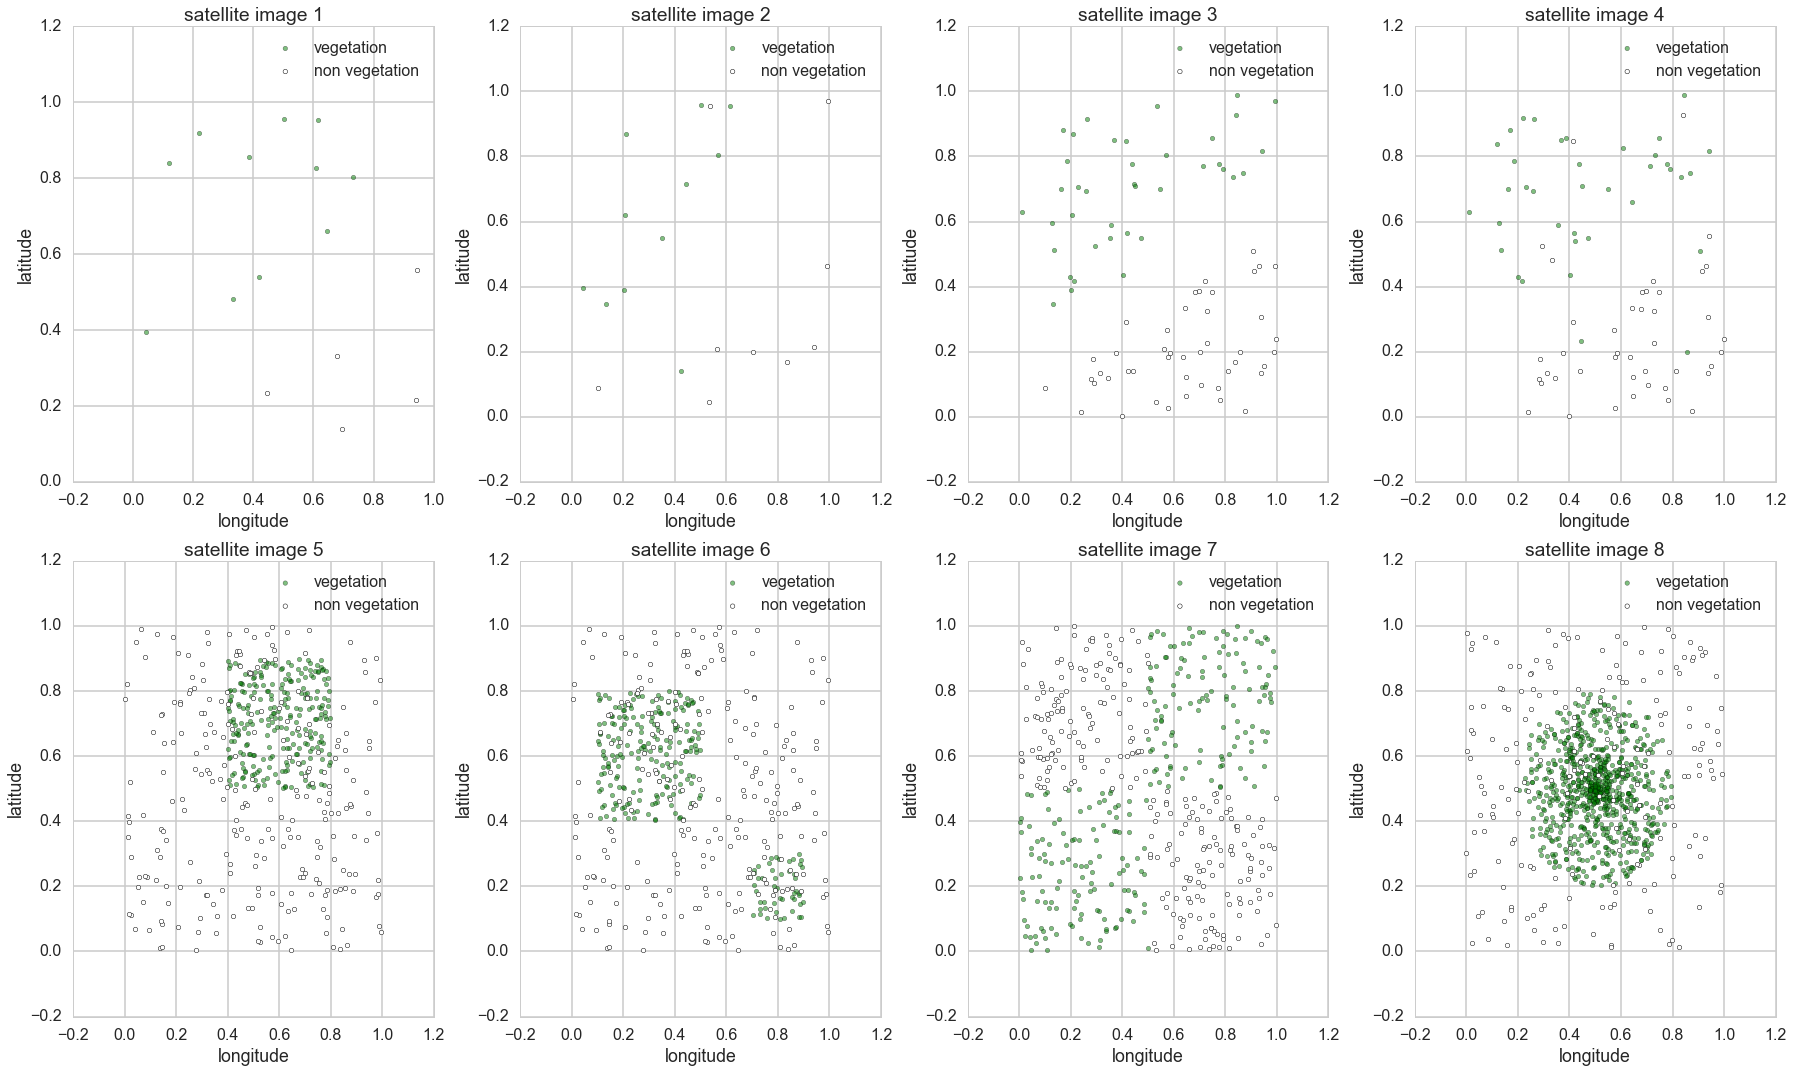

In [67]:
# Plot the data scatter for each dataset
# --------------------------------------

fig, ax = plt.subplots(2, 4, figsize=(25, 15))

#Iterate through images/dataframes
for i in range(len(sat_images)):
    #Get the long/lat coords
    x = sat_images[i].values[:, :-1]
    #Get the class labels
    y = sat_images[i].values[:, -1]
    
    if i > 3:
        m , n = 1 , i - 4
    else:
        m , n = 0 ,  i
    
    #Plot vegetation locations as green dots
    ax[m,n].scatter(x[y == 1, 0], x[y == 1, 1], c='green', label='vegetation', alpha = 0.5)
    #Plot non-vegetation locations as white dots
    ax[m,n].scatter(x[y == 0, 0], x[y == 0, 1], c='white', label='non vegetation')
    
    #Label everything
    ax[m,n].set_xlabel('longitude')
    ax[m,n].set_ylabel('latitude')
    ax[m,n].set_title('satellite image {}'.format(i + 1))
    ax[m,n].legend(loc = 'best')
    
plt.tight_layout()
plt.show() 

<br>

**2. Visualize Decision Boundaries:**


<br>

a. Linear Regression:

<br>

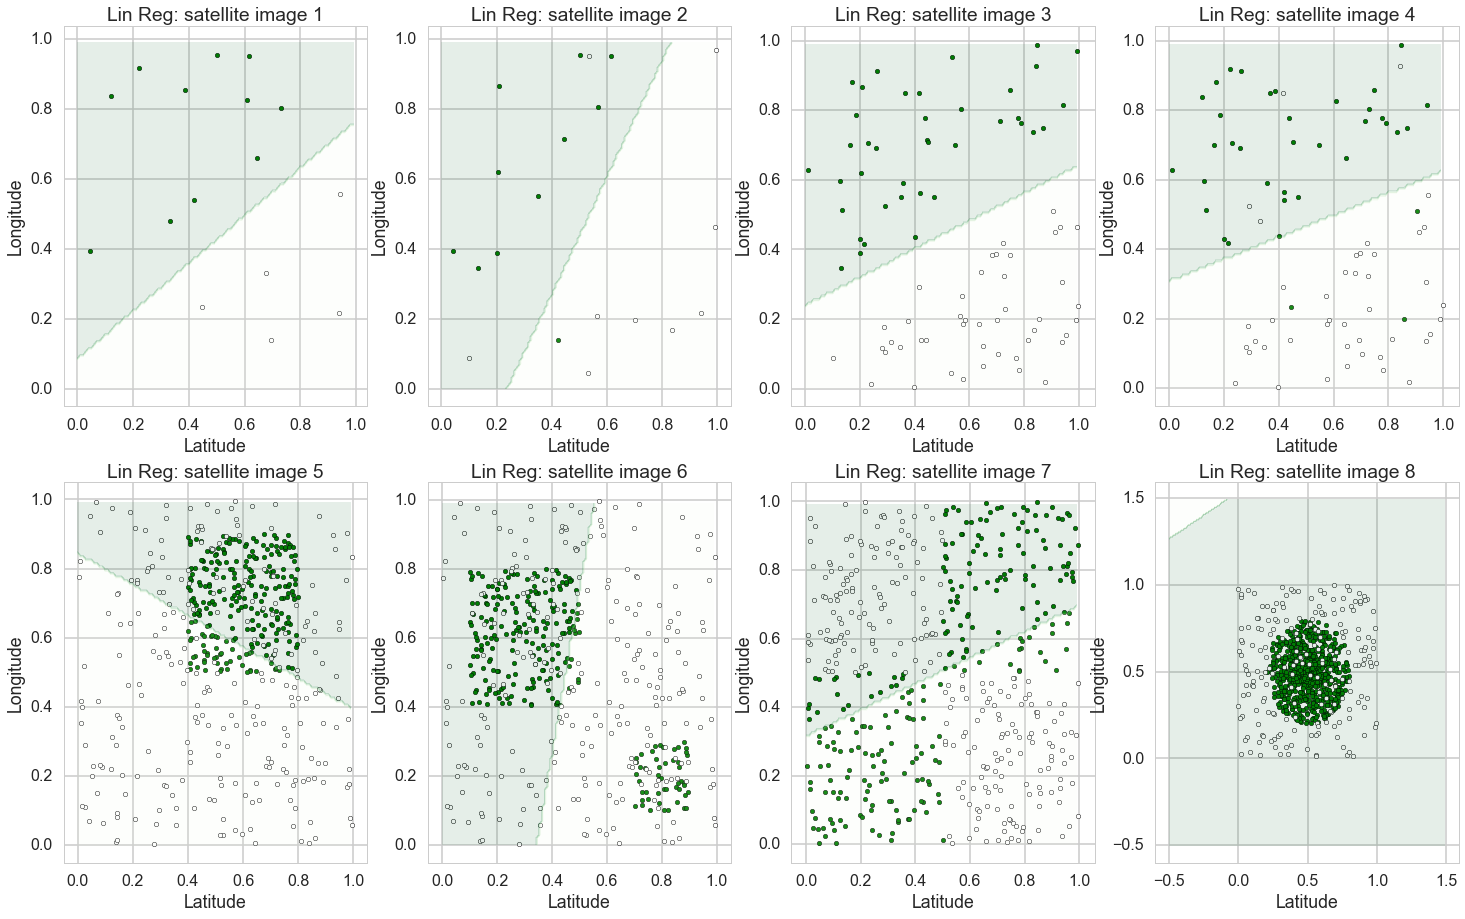

In [68]:
#Plot the data in each dataframe as a subplot of a single figure
fig, ax1 = plt.subplots(2, 4, figsize=(25, 15))

#Create a linear regression model with linear boundary
linreg = Lin_Reg()

#Iterate through the four images/dataframes
for i in range(len(sat_images)):       
    
    # Adjust index
    if i > 3:
        m , n = 1 , i - 4
    else:
        m , n = 0 ,  i
        
    #Get the long/lat coords
    x = sat_images[i].values[:, :-1]
    
    #Get the class labels
    y = sat_images[i].values[:, -1]    
    
    #Fit our logistic regression model
    linreg.fit(x, y)
    
    #Change the bounds on the scatter plot (the 4th dataframe needs a larger frame)
    if i == 7:
        bounds = (-0.5, 1.5)
    else:
        bounds = (0, 1)
    
    #Plot the data along with the decision boundary learned by our model
    ax1[m , n] = plot_decision_boundary(x, y, linreg, 
                                   'Lin Reg: satellite image {}'.format(i + 1), 
                                   ax1[m,n], bounds , reg = True)
    

plt.show()

<br>

b. Logistic regression:

<br>

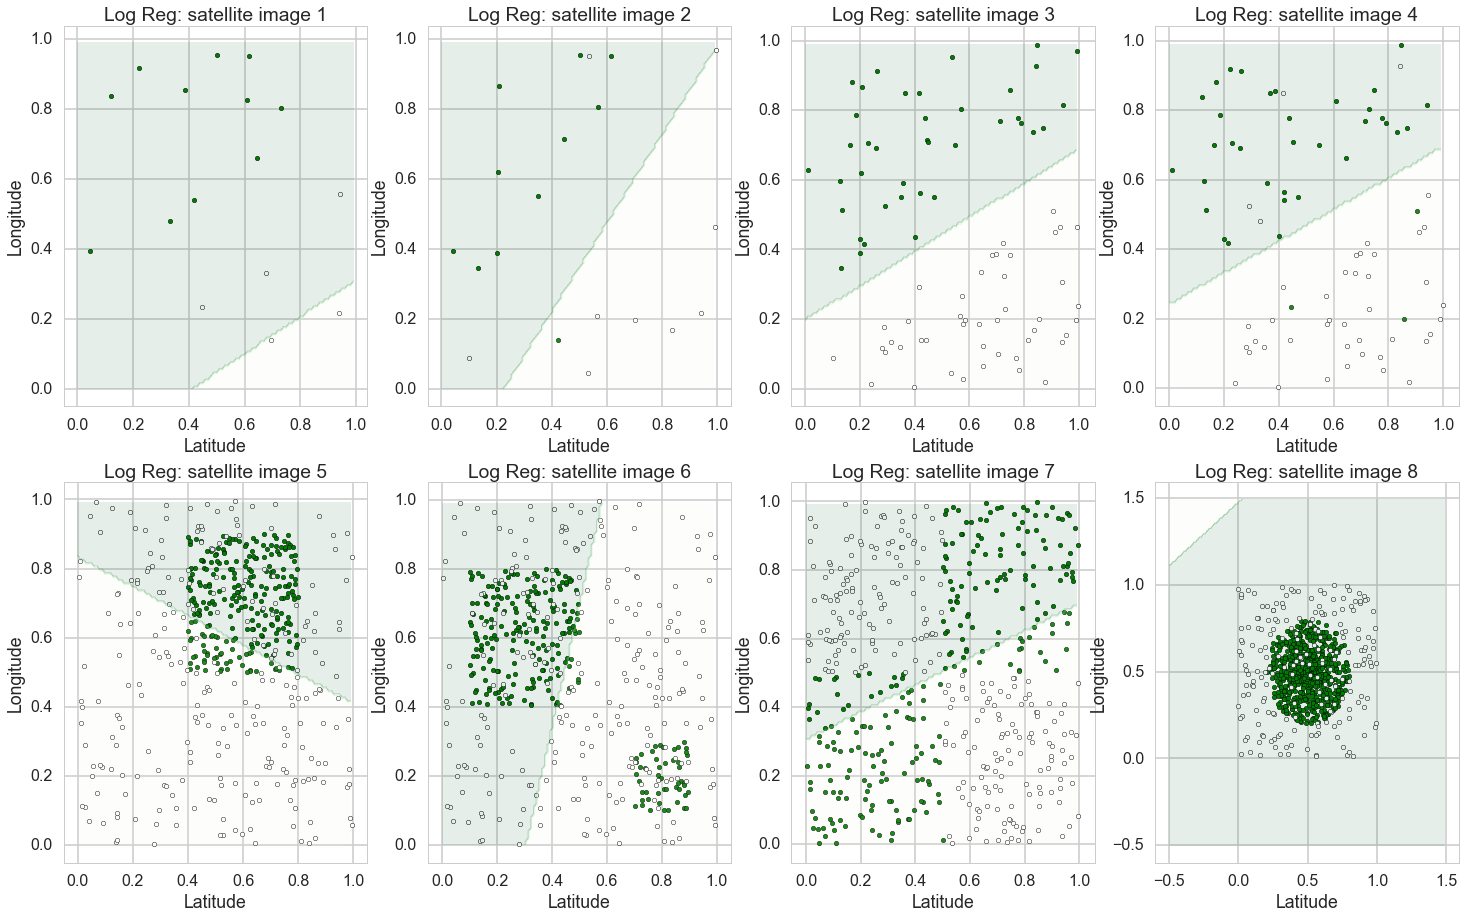

In [69]:
#Plot the data in each dataframe as a subplot of a single figure
fig, ax2 = plt.subplots(2, 4, figsize=(25, 15))

#Create a logistic regression model with linear boundary
logreg = linear_model.LogisticRegression()

#Iterate through the four images/dataframes
for i in range(len(sat_images)):       
    
    # Adjust index
    if i > 3:
        m , n = 1 , i - 4
    else:
        m , n = 0 ,  i
        
    #Get the long/lat coords
    x = sat_images[i].values[:, :-1]
    
    #Get the class labels
    y = sat_images[i].values[:, -1]    
    
    #Fit our logistic regression model
    logreg.fit(x, y)
    
    #Change the bounds on the scatter plot (the 4th dataframe needs a larger frame)
    if i == 7:
        bounds = (-0.5, 1.5)
    else:
        bounds = (0, 1)
    
    #Plot the data along with the decision boundary learned by our model
    ax2[m , n] = plot_decision_boundary(x, y, logreg, 
                                   'Log Reg: satellite image {}'.format(i + 1), 
                                   ax2[m,n], bounds)
    

plt.show()

<br>

c. LDA:

<br>

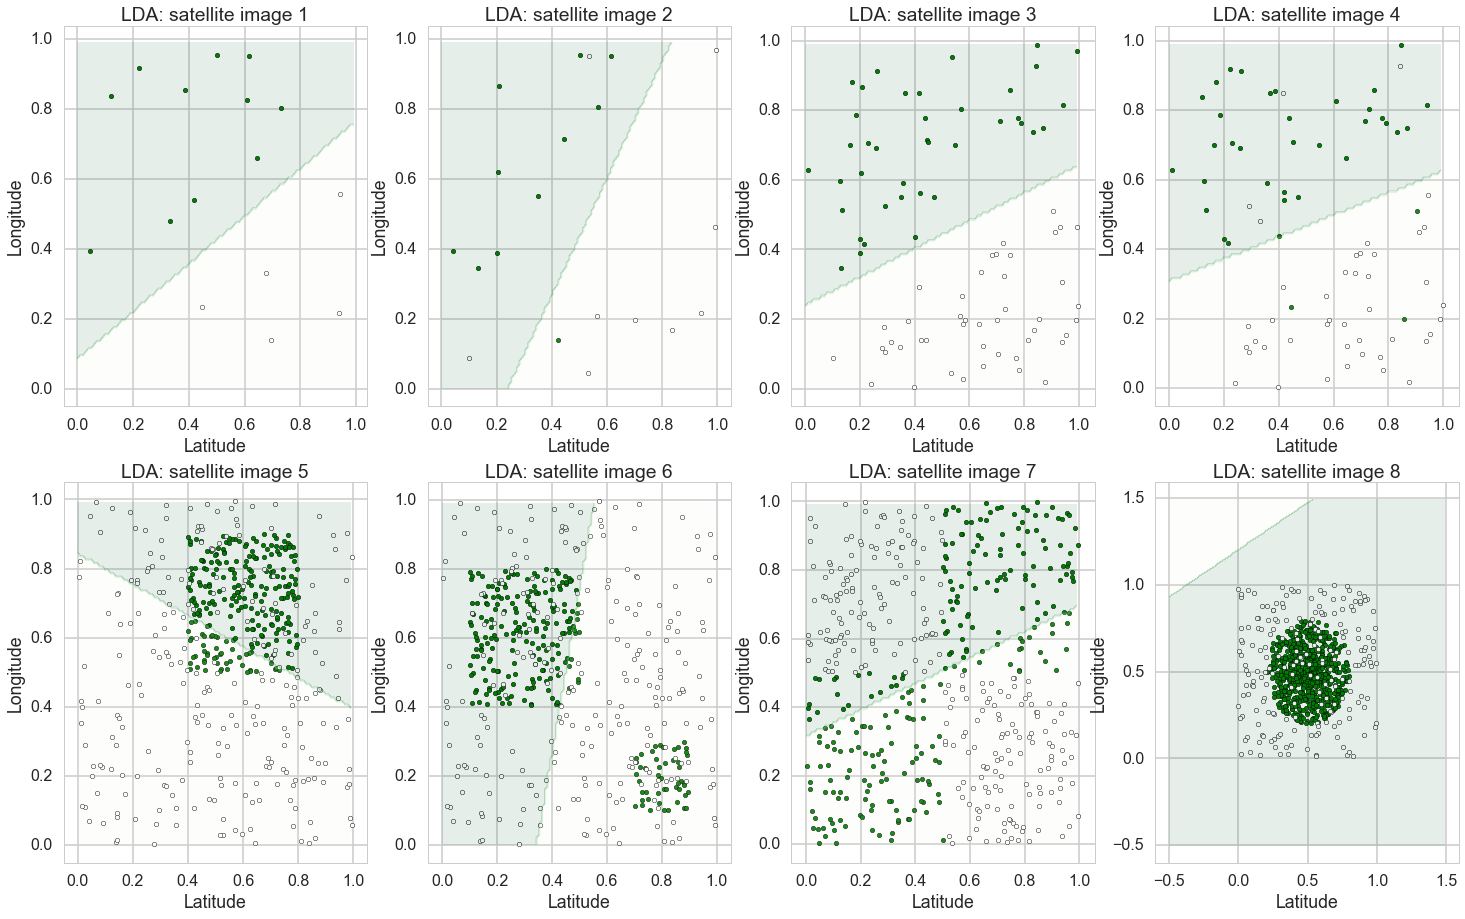

In [70]:
#Plot the data in each dataframe as a subplot of a single figure
fig, ax3 = plt.subplots(2, 4, figsize=(25, 15))

#Create an LDA model with linear boundary
lda = LDA()

#Iterate through the four images/dataframes
for i in range(len(sat_images)):       
    
    # Adjust index
    if i > 3:
        m , n = 1 , i - 4
    else:
        m , n = 0 ,  i
        
    #Get the long/lat coords
    x = sat_images[i].values[:, :-1]
    
    #Get the class labels
    y = sat_images[i].values[:, -1]    
    
    #Fit our logistic regression model
    lda.fit(x, y)
    
    #Change the bounds on the scatter plot (the 4th dataframe needs a larger frame)
    if i == 7:
        bounds = (-0.5, 1.5)
    else:
        bounds = (0, 1)
    
    #Plot the data along with the decision boundary learned by our model
    ax3[m , n] = plot_decision_boundary(x, y, lda, 
                                   'LDA: satellite image {}'.format(i + 1), 
                                   ax3[m,n], bounds)
    

plt.show()

<br>

d. support vector classifier (C = 1):

<br>

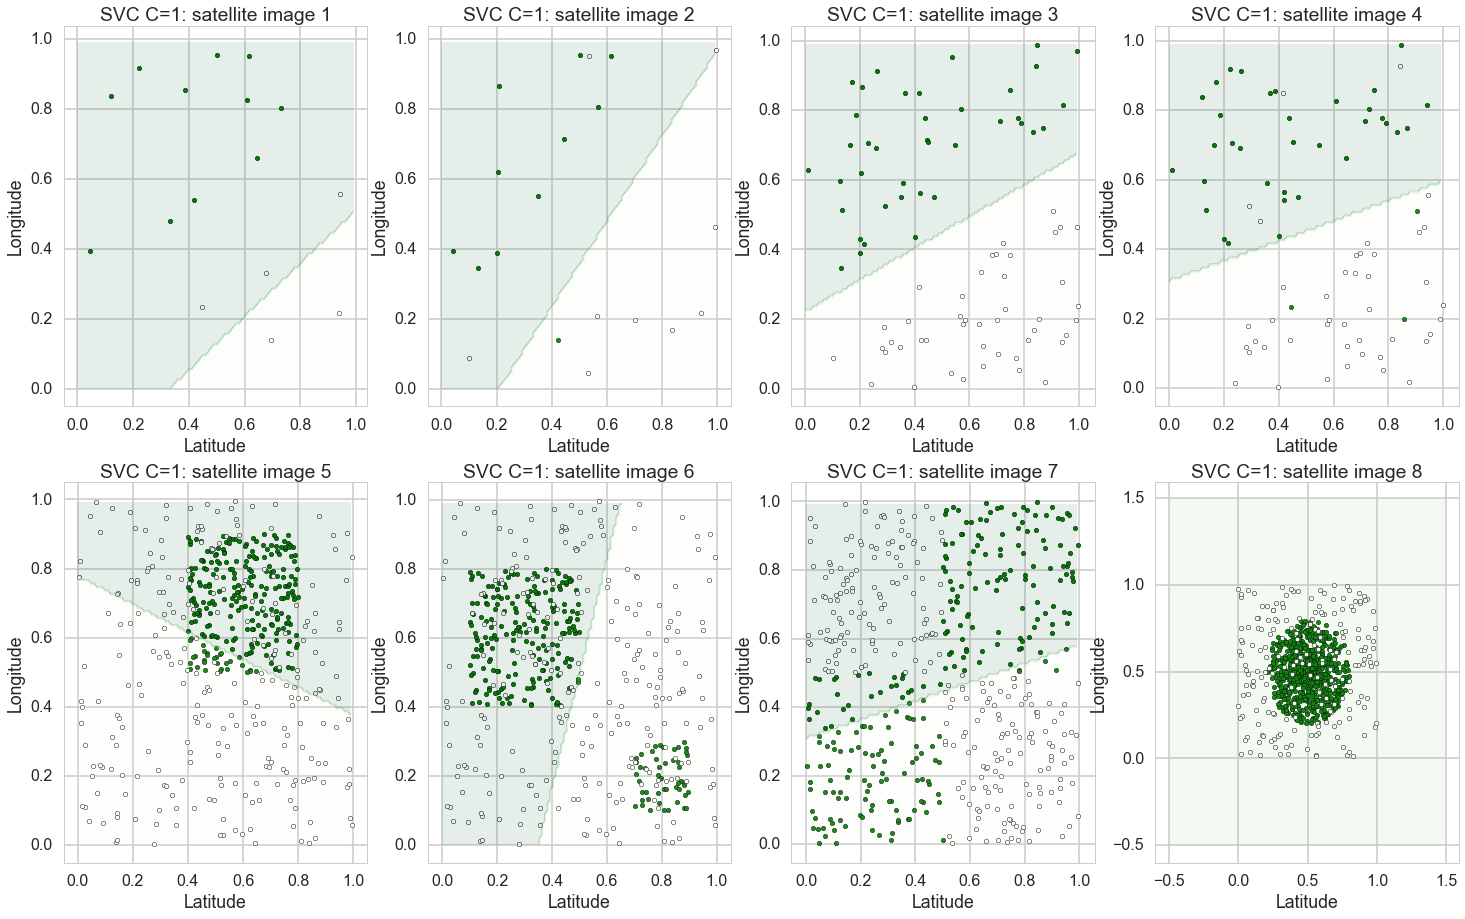

In [71]:
#Plot the data in each dataframe as a subplot of a single figure
fig, ax4 = plt.subplots(2, 4, figsize=(25, 15))

#Create an svc model
svc1 = svm.SVC(C = 1 , kernel = 'linear')

#Iterate through the four images/dataframes
for i in range(len(sat_images)):       
    
    # Adjust index
    if i > 3:
        m , n = 1 , i - 4
    else:
        m , n = 0 ,  i
        
    #Get the long/lat coords
    x = sat_images[i].values[:, :-1]
    
    #Get the class labels
    y = sat_images[i].values[:, -1]    
    
    #Fit our logistic regression model
    svc1.fit(x, y)
    
    #Change the bounds on the scatter plot (the 4th dataframe needs a larger frame)
    if i == 7:
        bounds = (-0.5, 1.5)
    else:
        bounds = (0, 1)
    
    #Plot the data along with the decision boundary learned by our model
    ax4[m , n] = plot_decision_boundary(x, y, svc1, 
                                   'SVC C=1: satellite image {}'.format(i + 1), 
                                   ax4[m,n], bounds)
    

plt.show()

<br>

e. support vector classifier (C = 100):

<br>

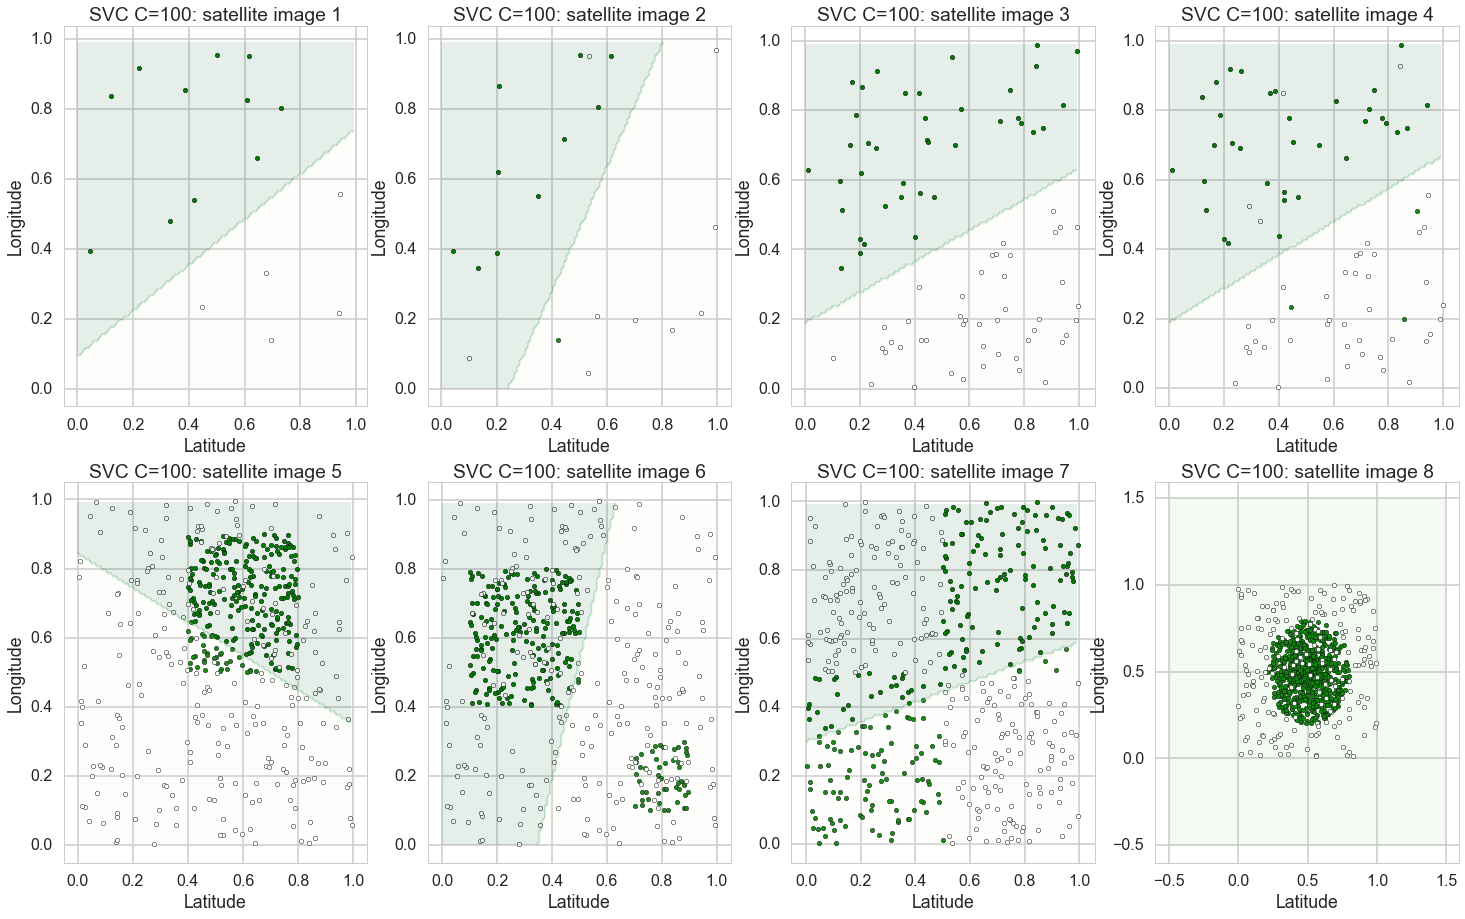

In [72]:
#Plot the data in each dataframe as a subplot of a single figure
fig, ax5 = plt.subplots(2, 4, figsize=(25, 15))

#Create an svc model
svc2 = svm.SVC(C = 100 , kernel = 'linear')

#Iterate through the four images/dataframes
for i in range(len(sat_images)):       
    
    # Adjust index
    if i > 3:
        m , n = 1 , i - 4
    else:
        m , n = 0 ,  i
        
    #Get the long/lat coords
    x = sat_images[i].values[:, :-1]
    
    #Get the class labels
    y = sat_images[i].values[:, -1]    
    
    #Fit our logistic regression model
    svc2.fit(x, y)
    
    #Change the bounds on the scatter plot (the 4th dataframe needs a larger frame)
    if i == 7:
        bounds = (-0.5, 1.5)
    else:
        bounds = (0, 1)
    
    #Plot the data along with the decision boundary learned by our model
    ax5[m , n] = plot_decision_boundary(x, y, svc2, 
                                   'SVC C=100: satellite image {}'.format(i + 1), 
                                   ax5[m,n], bounds)
    

plt.show()

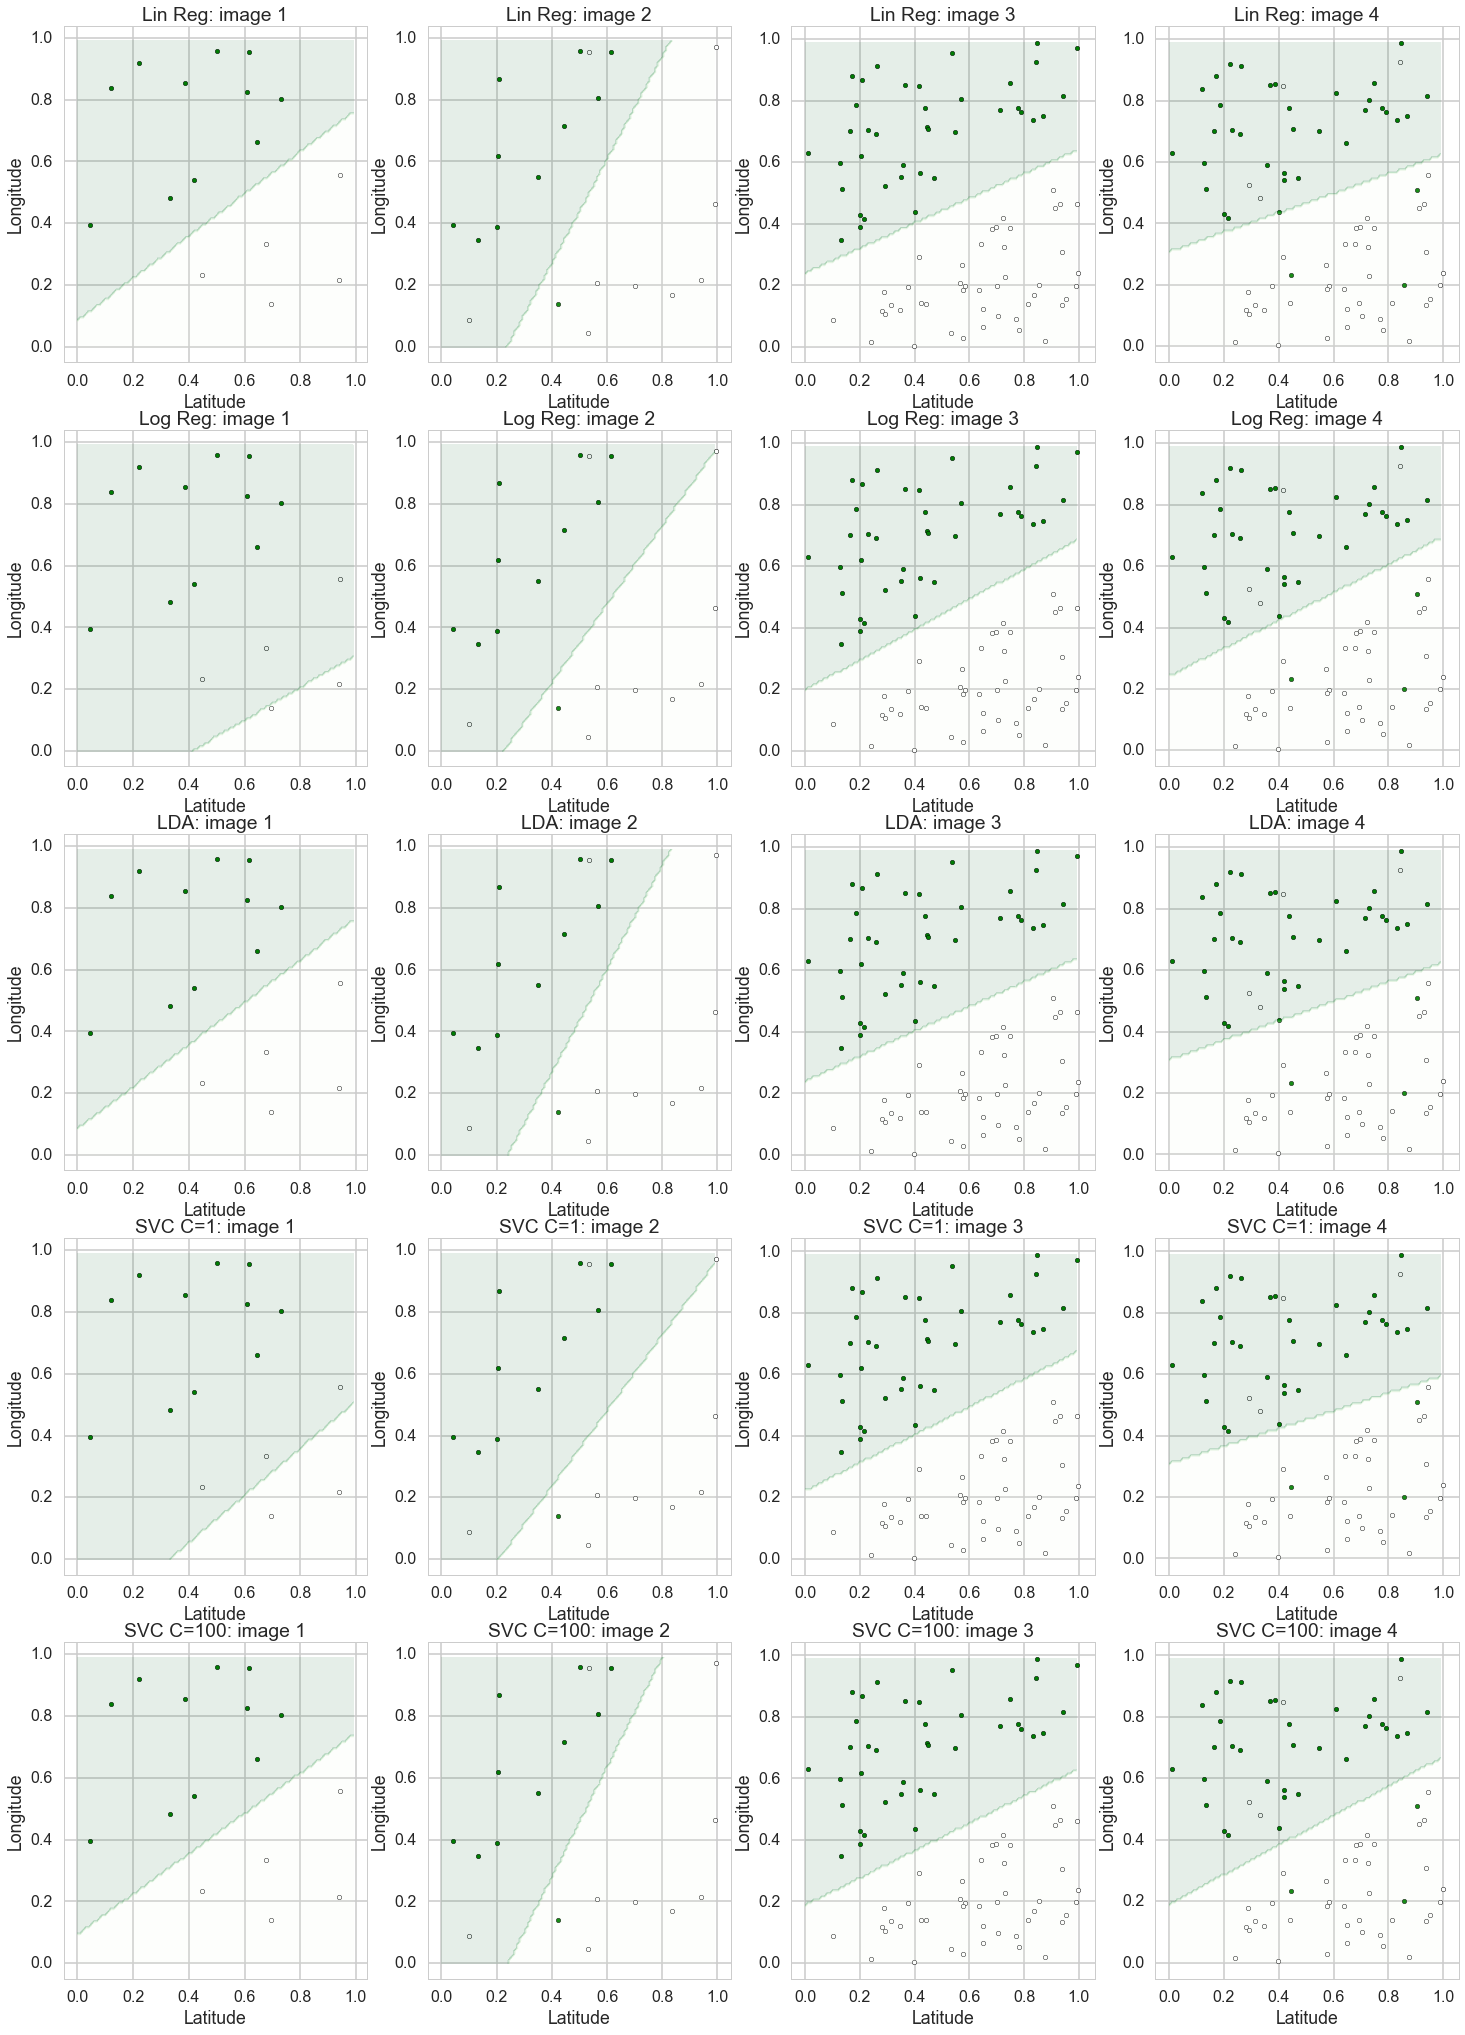

In [73]:
# plot for the test and train datasets:
# ------------------------------------

fig, ax = plt.subplots(5, 4, figsize=(25, 35))

models = [linreg , logreg, lda, svc1, svc2]

# Loop for the models
for i in range(len(models)):
    
    # selecting model
    mod = models[i]
    
    # specify regression
    if i == 0:
        reg_ind = True
    else:
        reg_ind = False
    
    titles = ['Lin Reg' , 'Log Reg' , 'LDA' , 'SVC C=1' , 'SVC C=100']
    # Loop for the data
    for j in range(4):
        
        #Get the long/lat coords
        x = sat_images[j].values[:, :-1]
    
        #Get the class labels
        y = sat_images[j].values[:, -1]  
        
        # Fit the model
        mod.fit(x , y)
        
        # set title
        title = titles[i] + ': image {}'.format(j + 1)
        
        # initiate the plot
        ax[i,j] = plot_decision_boundary(x, y, mod, title, ax[i,j] , reg = reg_ind)
    

**Remarks**

<br>
 - For the prformance on the data sets from HW7, there is no difference in the decision boundary between the the different classifiers as linear classifiers performs poorly with those datasets
 - For dataset 1 and 2(training) the performance of the linear regression, LDA and SVC with more emphasis on the accurracy are very close this is due to the fact that the linear regression cost (error square) is mainly penalizing the low accuracy. Also the LDA is trying to keep a balanced distribution on both sides which may compromise on the acurracy to achieve this purpose.
 - The logistic regression only cares about the probability and clearly it was affected by the imbalaced classes. 
 - When the support vector classifier is steered towards more accurracy, it tends to perfrom close to the linear regression and the LDA. However, when the margin of seperation is more of concern than the accuracy, the performance is close to the logistic regression where the imbalance affect the class separation
 - For datasets 3 and 4 when the two classes are balanced, the performance of the linear regression, logistic regression, LDA and SVC with more emphasis on the margin of separation have a very close performance. For the SVCwith C = 1000 (more accuracy) we can see that the margin of separation is more enlarged to achieve a better accuracy
 
<br>

**3. Consider Support Vector Classifier:**

<br>
a. Effect of data change:

<br>

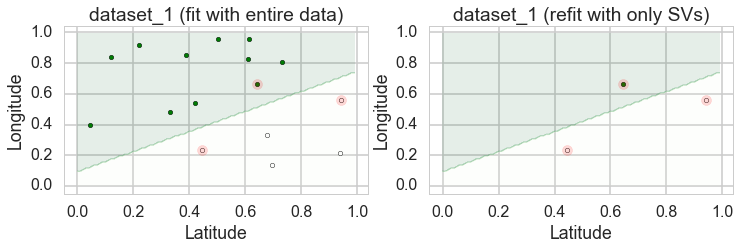

In [74]:
# Load dataset_1
# --------------

# data
x = sat_images[0].values[:, :-1]
y = sat_images[0].values[:, -1]

# Fit SVM model with C = 1000, linear kernel
model = svm.SVC(C=1000, kernel='linear')
model.fit(x, y)

# Plot decision boundary
fig, ax = plt.subplots(1, 2, figsize = (12, 3))
ax[0] = plot_decision_boundary(x, y, model, 'dataset_1 (fit with entire data)', ax[0])

# Highlight the support vectors
sv_indices = model.support_ # retrieve the support vector indices
ax[0].scatter(x[sv_indices, 0], x[sv_indices, 1], color='red', alpha=0.15, s=100) # draw circles around SVs

# Isolate only support vectors and their labels
x_svs = x[sv_indices, :] 
y_svs = y[sv_indices]
model.fit(x_svs, y_svs)

# Plot decision boundary with only support vectors
ax[1] = plot_decision_boundary(x_svs, y_svs, model, 'dataset_1 (refit with only SVs)', ax[1])

# Highlight the support vectors
ax[1].scatter(x_svs[:, 0], x_svs[:, 1], color='red', alpha=0.15, s=100) # draw circles around SVs

plt.show()

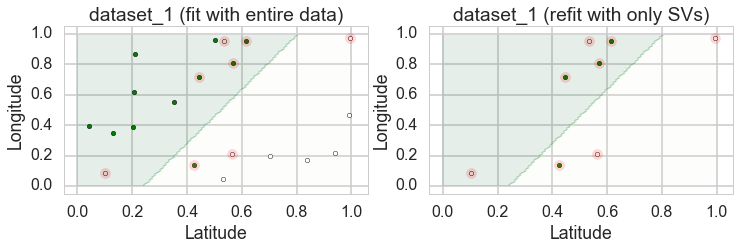

In [75]:
# Load dataset_2
# --------------

# data
x = sat_images[1].values[:, :-1]
y = sat_images[1].values[:, -1]

# Fit SVM model with C = 1000, linear kernel
model = svm.SVC(C=1000, kernel='linear')
model.fit(x, y)

# Plot decision boundary
fig, ax = plt.subplots(1, 2, figsize = (12, 3))
ax[0] = plot_decision_boundary(x, y, model, 'dataset_1 (fit with entire data)', ax[0])

# Highlight the support vectors
sv_indices = model.support_ # retrieve the support vector indices
ax[0].scatter(x[sv_indices, 0], x[sv_indices, 1], color='red', alpha=0.15, s=100) # draw circles around SVs

# Isolate only support vectors and their labels
x_svs = x[sv_indices, :] 
y_svs = y[sv_indices]
model.fit(x_svs, y_svs)

# Plot decision boundary with only support vectors
ax[1] = plot_decision_boundary(x_svs, y_svs, model, 'dataset_1 (refit with only SVs)', ax[1])

# Highlight the support vectors
ax[1].scatter(x_svs[:, 0], x_svs[:, 1], color='red', alpha=0.15, s=100) # draw circles around SVs

plt.show()

**Conclusion:**

The support vector points are the only necessary data required to define the decision boundary. Important results that cn be useful forsmall data sets



<br>

b. Tune the model parameters

<br>

In [76]:
#--------  fit_and_plot_svm_for_c
# Fit and plot SVM model for value of 'C', overlayed on a scatter plot of data 
# (fit on train set and evaluate on test set)
#
# Input: 
#      x_train (array of train predictors)
#      y_train (array of train responses)#      
#      x_test (array of test predictors)
#      y_test (array of test responses)
#      bounds (tuple of bounds for plotting)
#      C  (value for parameter C)
#      ax (axes to plot on)

def fit_and_plot_svm_for_c(data, x_train, y_train, x_test, y_test, C, ax, bounds=(0, 1)):
    # Fit SVM model
    model = svm.SVC(C=C, kernel='linear')
    model.fit(x_train, y_train)
    
    # Train and test error
    tr_acc = model.score(x_train, y_train)
    ts_acc = model.score(x_test, y_test)

    # Plot decision boundary
    plot_decision_boundary(x_train, y_train, model, \
                           str(data) + '- C = ' + str(C)\
                           + ', train acc = ' + str(tr_acc)\
                           + ', test acc = ' + str(ts_acc), ax, bounds)
    
    # Plot support vectors
    sv_indices = model.support_ # retrieve the support vector indices
    ax.scatter(x_train[sv_indices, 0], x_train[sv_indices, 1], color='red', alpha=0.15, s=100) # draw circles around SVs
    
    return ax

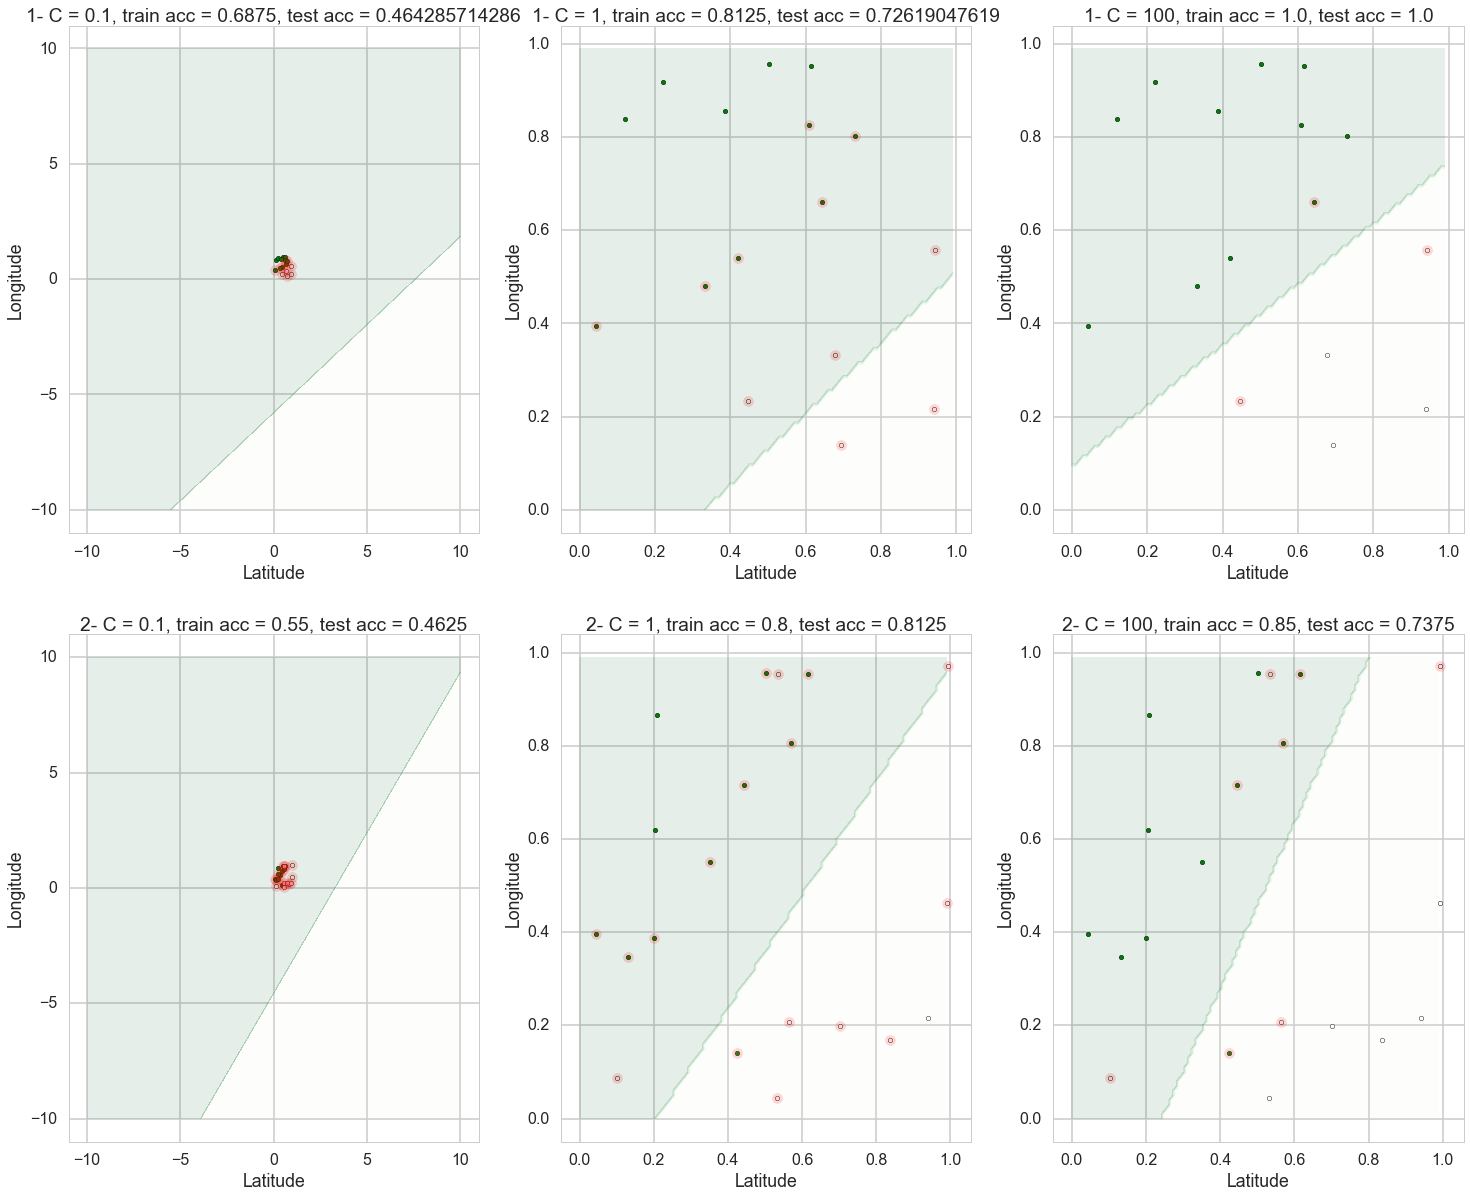

In [77]:
# train data set 1
data_train1 = sat_images[0].values
x_train1 = data_train1[:, 0:-1]
y_train1 = data_train1[:, -1]

# test data set 1
data_test1 = sat_images[2].values
x_test1 = data_test1[:, 0:-1]
y_test1 = data_test1[:, -1]

# train data set 2
data_train2 = sat_images[1].values
x_train2 = data_train2[:, 0:-1]
y_train2 = data_train2[:, -1]

# test data set 2
data_test2 = sat_images[3].values
x_test2 = data_test2[:, 0:-1]
y_test2 = data_test2[:, -1]

# Fit and plot for different 'C' values 
fig, ax = plt.subplots(2, 3, figsize = (25, 20))

# First set
ax[0,0] = fit_and_plot_svm_for_c(1, x_train1, y_train1, x_test1, y_test1, 0.1, ax[0,0], (-10, 10))

ax[0,1] = fit_and_plot_svm_for_c(1, x_train1, y_train1, x_test1, y_test1, 1, ax[0,1])

ax[0,2] = fit_and_plot_svm_for_c(1, x_train1, y_train1, x_test1, y_test1, 100, ax[0,2])

# Second set
ax[1,0] = fit_and_plot_svm_for_c(2, x_train2, y_train2, x_test2, y_test2, 0.1, ax[1,0], (-10, 10))

ax[1,1] = fit_and_plot_svm_for_c(2, x_train2, y_train2, x_test2, y_test2, 1, ax[1,1])

ax[1,2] = fit_and_plot_svm_for_c(2, x_train2, y_train2, x_test2, y_test2, 100, ax[1,2])

plt.show()

**Discusion:**

<br>
- For the first dataset the classes are perfectly separable. In this case increasing the C to achieve more accuracy will not lead to an overfit which is clearly obvious in the high score for C = 100 for both the training and test data
- Increasing the margin of separation in this case beyond the actual margin in the data can lead to a deterorating situation as shown in the cases for C = 0.1 and C = 1.
- An adequate C will be a value that generate a margin of separation in accordance to the actual separation distance in the data.
- When the class separation is not perfect as in the case of dataset 2, the value of C will determine the flexibility of the model. The more accuracy, the more flexible the model is. The more the separation margin is emphasized, the less flexible the model is. 
- When the flexibility is high (C = 100) overfitting can occur and a poor performance on the test data is observed.
- The less flexible the model the more biased the prediction is as shown in the case of C = 0.1


<br>

#### 4. Compare between Linear Models:



<br>
**Tune Models (SVC , Logistic Regression and LDA):**


<br>

In [78]:
# training and test datasets:
# --------------------------

# First dataset
x1  = x_train1
y1  = y_train1
x1t = x_test1
y1t = y_test1

# Second dataset
x2  = x_train2
y2  = y_train2
x2t = x_test2
y2t = y_test2

In [79]:
# Cross validation tuning for SVC:
# -------------------------------

# Specify a range of the C parameter
Reg1 = np.linspace(0.1, 15 , 400)

# score array
score_svc_1 = []
score_svc_2 = []

# perform cross validation for all possible parameters
for c in Reg1:
    
    # model specification
    mod = svm.SVC(C=c, kernel='linear')
    
    # claculate score CV
    score1 = KFcv(mod , x1 , y1)
    score2 = KFcv(mod , x2 , y2)
    
    # Add to array
    score_svc_1.append(np.average(score1))
    score_svc_2.append(np.average(score2))

# Score array 
svc_score_1 = np.array(score_svc_1)
svc_score_2 = np.array(score_svc_2)

# Best parameter
svc_best_1 = Reg1[np.argmax(svc_score_1)]
svc_best_2 = Reg1[np.argmax(svc_score_2)]

print '\nBest parameter for the first dataset  :   ' , svc_best_1
print 'Best parameter for the second dataset  :   ' , svc_best_2
print ' '


Best parameter for the first dataset  :    5.29072681704
Best parameter for the second dataset  :    0.84686716792
 


In [80]:
# Cross validation tuning for Logistic Regression:
# ------------------------------------------------

# Specify a range of the C parameter
Reg2 = np.array(range(-4,9,1))

# score array
score_logreg_1 = []
score_logreg_2 = []

# perform cross validation for all possible parameters
for c in Reg2:
    
    # model specification
    mod = linear_model.LogisticRegression(C = 10. ** c)
    
    # claculate score CV
    score1 = KFcv(mod , x1 , y1)
    score2 = KFcv(mod , x2 , y2)
    
    # Add to array
    score_logreg_1.append(np.average(score1))
    score_logreg_2.append(np.average(score2))

# Score array 
logreg_score_1 = np.array(score_logreg_1)
logreg_score_2 = np.array(score_logreg_2)

# Best parameter
logreg_best_1 = Reg2[np.argmax(logreg_score_1)]
logreg_best_2 = Reg2[np.argmax(logreg_score_2)]

print '\nBest parameter for the first dataset  :   ' , 10 ** logreg_best_1
print 'Best parameter for the second dataset  :   ' , 10 ** logreg_best_2
print ' '


Best parameter for the first dataset  :    10
Best parameter for the second dataset  :    100
 


In [81]:
# Cross validation tuning for LDA:
# -------------------------------

# Specify a range of the C parameter
Reg3 = np.linspace(0.,1.,100)

# score array
score_lda_1 = []
score_lda_2 = []

# perform cross validation for all possible parameters
for c in Reg3:
    
    # model specification
    mod = LDA(solver = 'lsqr' , shrinkage = c)
    
    # claculate score CV
    score1 = KFcv(mod , x1 , y1)
    score2 = KFcv(mod , x2 , y2)
    
    # Add to array
    score_lda_1.append(np.average(score1))
    score_lda_2.append(np.average(score2))

# Score array 
lda_score_1 = np.array(score_lda_1)
lda_score_2 = np.array(score_lda_2)

# Best parameter
lda_best_1 = Reg3[np.argmax(lda_score_1)]
lda_best_2 = Reg3[np.argmax(lda_score_2)]

print '\nBest parameter for the first dataset  :   ' , lda_best_1
print 'Best parameter for the second dataset  :   ' , lda_best_2
print '  '


Best parameter for the first dataset  :    0.0
Best parameter for the second dataset  :    0.0
  


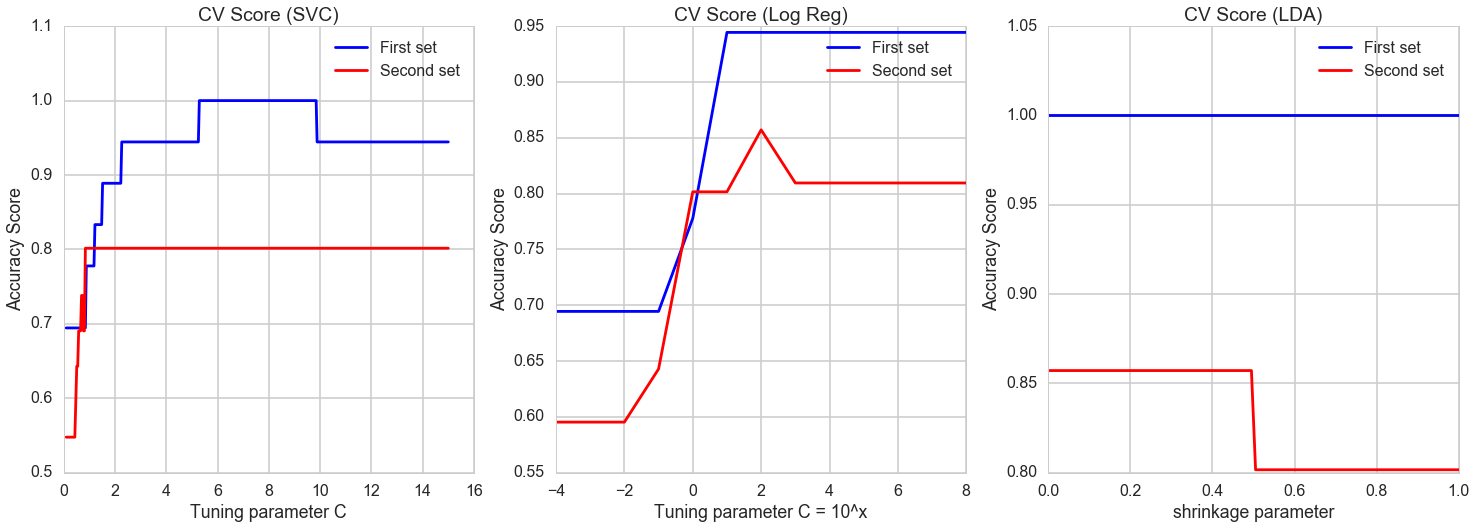


 From the graph, a value of C = 10 for the SVC will satisfy both datasets




In [82]:
# Visualize:
# ----------

# Initiate figure
fig = plt.figure(figsize = (25,8))

# SVC
ax1 = fig.add_subplot(131)
ax1.plot(Reg1, svc_score_1 , color = 'blue' , label = 'First set')
ax1.plot(Reg1, svc_score_2 , color = 'red' , label = 'Second set')
ax1.set_title('CV Score (SVC)')
ax1.set_ylabel('Accuracy Score')
ax1.set_xlabel('Tuning parameter C')
ax1.legend(loc = 'best')

# Logistic regression
ax2 = fig.add_subplot(132)
ax2.plot(Reg2, logreg_score_1 , color = 'blue' , label = 'First set')
ax2.plot(Reg2, logreg_score_2 , color = 'red' , label = 'Second set')
ax2.set_title('CV Score (Log Reg)')
ax2.set_ylabel('Accuracy Score')
ax2.set_xlabel('Tuning parameter C = 10^x')
ax2.legend(loc = 'best')

# LDA
ax3 = fig.add_subplot(133)
ax3.plot(Reg3, lda_score_1 , color = 'blue' , label = 'First set')
ax3.plot(Reg3, lda_score_2 , color = 'red' , label = 'Second set')
ax3.set_title('CV Score (LDA)')
ax3.set_ylabel('Accuracy Score')
ax3.set_xlabel('shrinkage parameter')
ax3.legend(loc = 'best')

plt.show()

print '\n From the graph, a value of C = 10 for the SVC will satisfy both datasets\n\n'

#### Fit The models


<br>

In [83]:
# Fit the models and evaluate predictions:
# =======================================

# linear regression
# -----------------

# First data set
mod_reg1 = Lin_Reg()
regr1   = mod_reg1.fit(x1 , y1)
yreg1   = regr1.predict(x1t)
yreg1[yreg1 < 0.5] = 0.
yreg1[yreg1 >= 0.5] = 1.
score_regr1 = float(np.sum(yreg1 == y1t)) / len(yreg1)

# Second data set
mod_reg2 = Lin_Reg()
regr2   = mod_reg2.fit(x2 , y2)
yreg2   = regr2.predict(x2t)
yreg2[yreg2 < 0.5] = 0.
yreg2[yreg2 >= 0.5] = 1.
score_regr2 = float(np.sum(yreg2 == y2t)) / len(yreg2)


# Logistic regression
# -------------------

# First data set
mod_log1  = linear_model.LogisticRegression(C = 10. ** logreg_best_1)
logr1    = mod_log1.fit(x1 , y1)
ylogreg1 = logr1.predict(x1t)
score_logreg1 = logr1.score(x1t , y1t)

# Second data set
mod_log2  = linear_model.LogisticRegression(C = 10. ** logreg_best_2)
logr2    = mod_log2.fit(x1 , y1)
ylogreg2 = logr2.predict(x2t)
score_logreg2 = logr2.score(x2t , y2t)


# LDA
# ----

# First data set
mod_lda1   = LDA()
lda1       = mod_lda1.fit(x1 , y1)
ylda1      = lda1.predict(x1t)
score_lda1 = lda1.score(x1t , y1t)

# Second data set
mod_lda2   = LDA()
lda2       = mod_lda2.fit(x2 , y2)
ylda2      = lda2.predict(x2t)
score_lda2 = lda2.score(x2t , y2t)

# SVC
# ---

# best tuning parameter:
svc_best = 10

# First data set
mod_svc1   = svm.SVC(C=svc_best, kernel='linear')
svc1       = mod_svc1.fit(x1 , y1)
ysvc1      = svc1.predict(x1t)
score_svc1 = svc1.score(x1t , y1t)

# Second data set
mod_svc2   = svm.SVC(C=svc_best, kernel='linear')
svc2       = mod_svc2.fit(x2 , y2)
ysvc2      = svc2.predict(x2t)
score_svc2 = svc2.score(x2t , y2t)

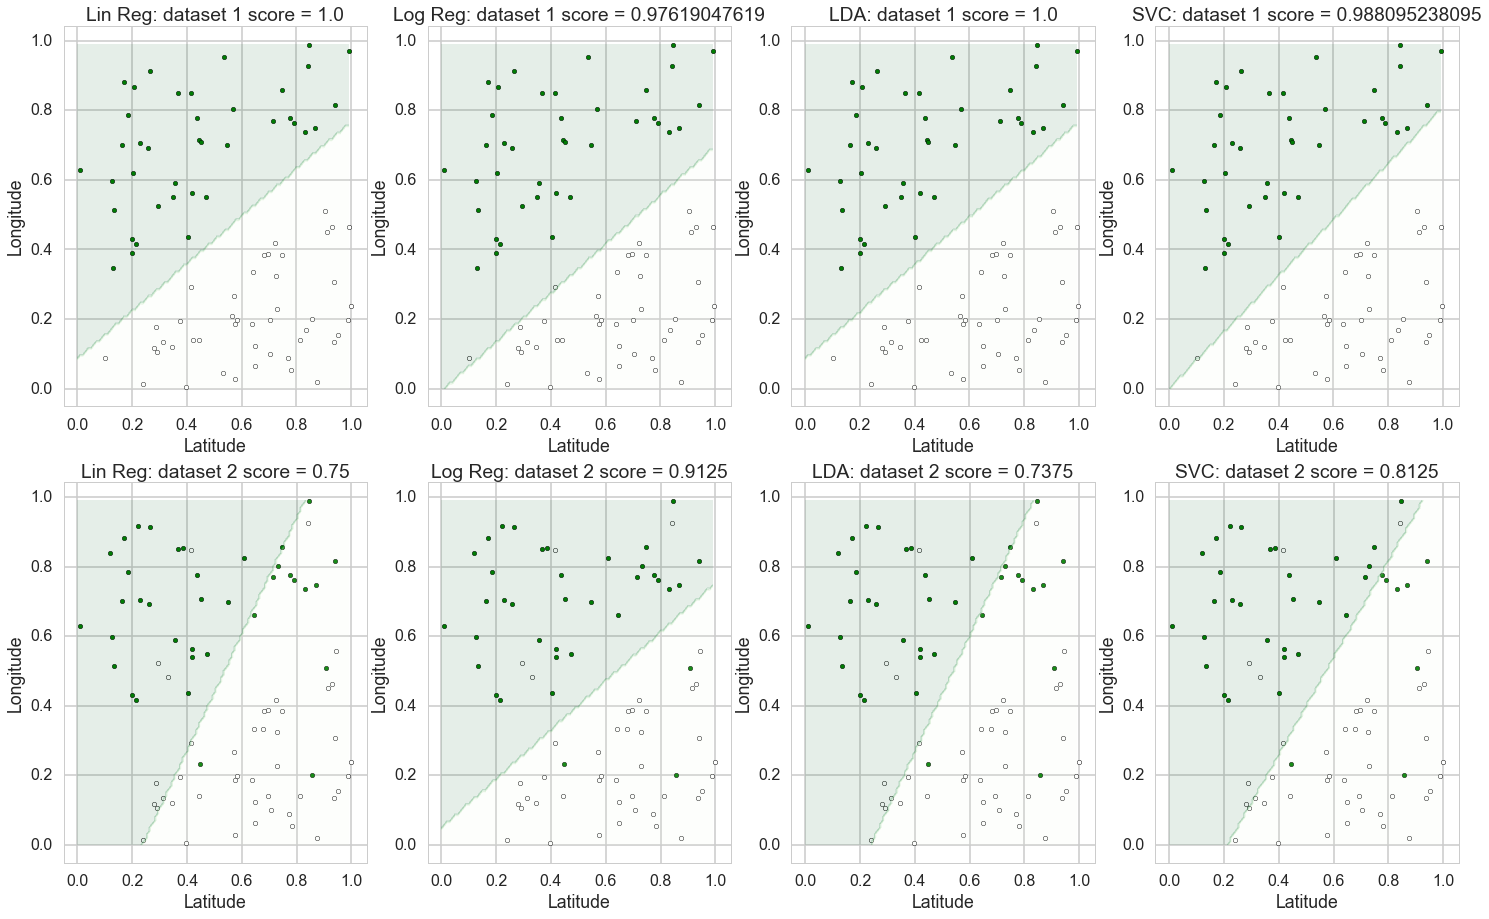

In [84]:
# Visualize the decision boundary for all tuned models on the two test data sets:
# ------------------------------------------------------------------------------

fig, ax = plt.subplots(2, 4, figsize=(25, 15))

# models list
models = [[regr1 , logr1, lda1, svc1] , [regr2 , logr2, lda2, svc2]]

# scores
scores = [[score_regr1 , score_logreg1 , score_lda1 , score_svc1]
          , [score_regr2 , score_logreg2 , score_lda2 , score_svc2]]

# data list
features = [x1t , x2t]
predict  = [y1t , y2t]

# Titles
titles = ['Lin Reg' , 'Log Reg' , 'LDA' , 'SVC']

# Loop for the models
for i in range(len(models)):
    
    # data
    x = features[i]
    y = predict[i]
   
    # Loop for the data
    for j in range(len(models[0])):
        
        # Identify regression
        if j == 0:
            reg_ind = True
        else:
            reg_ind = False
            
        # specify the model
        mod = models[i][j]
        
        # set title
        title = titles[j] + ': dataset {}'.format(i + 1) + ' score = {}'.format(scores[i][j])
        
        # initiate the plot
        ax[i,j] = plot_decision_boundary(x, y, mod, title, ax[i,j] , reg = reg_ind)
    

**Remarks based on the decision boundaries:**

 - For the first dataset where the classes are separable, both the linear regression and the LDA have a superior performance since the gaussian assumption is suitable in this case for both models in addition to the balanced classes with similar distributions
 - The margin of separation in the support vector classifier enabled the svc to perform better than the logistic regression for this dataset where the classes are separable
 - Fo the second dataset, since the classes are not easily separable, the logistic regression has the best performance due to the fact that it is based on the probability and does not depend on any characteristics of the classes cluster
 - For the SVC the trade off between the margin of separation and the accuracy had an effect on having a moderate accuracy. If the model was tunned more aggressively towards accuracy, it could have a better performance for the first dataset (refer to previous section where accuracy was 1 for test set). However, increasing the emphasis on the accuracy could lead to an overfir situation which would be obvious for the second dataset application (previous section with C = 100, the test accuracy was 0.74 which is less than 0.8125 in the case in hand)
 
<br>

<br>

**Performance metrics and quantitative comparison (Accurracy , f1 score , faulse positive ratio and false negative ratio):**


<br>

In [85]:
# Function to calculate metrics:
# ------------------------------

def metrics (ypred , ytest):
    
    # dataset one
    total_pred_yes = np.sum(ypred == 1.)
    total_pred_no = np.sum(ypred == 0.)
    total_true_yes = np.sum(ytest == 1.)
    total_true_no  = np.sum(ytest == 0.)
    
    # true predictions
    y_true = ytest[ypred == ytest] 
    
    # true positive
    true_pos = y_true[y_true == 1.]
    
    # true negatives
    true_neg = y_true[y_true == 0.]
    
    # rcall and percision
    recall = float(len(true_pos)) / total_true_yes
    
    percision = float(len(true_pos)) / total_pred_yes
    
    f1 = 2 * recall * percision / ( recall + percision )
    tp_ratio = float(len(true_pos)) / total_pred_yes
    tn_ratio = float(len(true_neg)) / total_pred_no
    
    return f1 , tp_ratio , 1. - tn_ratio

In [86]:
# Apply for the three dtasets:
# ---------------------------

# linear regression
f1_reg1 , tpr_reg1 , fnr_reg1 = metrics (yreg1 , y1t)
f1_reg2 , tpr_reg2 , fnr_reg2 = metrics (yreg2 , y2t)

# Logistic regression
f1_log1 , tpr_log1 , fnr_log1 = metrics (ylogreg1 , y1t)
f1_log2 , tpr_log2 , fnr_log2 = metrics (ylogreg2 , y2t)

# LDA
f1_lda1 , tpr_lda1 , fnr_lda1 = metrics (ylda1 , y1t)
f1_lda2 , tpr_lda2 , fnr_lda2 = metrics (ylda2 , y2t)

# SVC
f1_svc1 , tpr_svc1 , fnr_svc1 = metrics (ysvc1 , y1t)
f1_svc2 , tpr_svc2 , fnr_svc2 = metrics (ysvc2 , y2t)

# Aggregate for dataset1
set1_metrics_scores = np.array(scores[0])
set1_metrics_f1 = np.array([f1_reg1 , f1_log1 , f1_lda1 , f1_svc1])
set1_metrics_tpr = np.array([tpr_reg1 , tpr_log1 , tpr_lda1 , tpr_svc1])
set1_metrics_fnr = np.array([fnr_reg1 , fnr_log1 , fnr_lda1 , fnr_svc1])

total_metrics1_a = np.concatenate((set1_metrics_scores , set1_metrics_f1) , axis = 0).reshape(2,4)
total_metrics1_b = np.concatenate((set1_metrics_tpr , set1_metrics_fnr) , axis = 0).reshape(2,4)
total_metrics_1 = np.concatenate((total_metrics1_a , total_metrics1_b) , axis = 0)
metrics_1 = pd.DataFrame(total_metrics_1 , columns = ['Linear_reg_1' , 'Log_reg_1' , 'LDA_1' , 'SVC_1'] , 
                        index = ['accuracy' , 'f1_metric' , 'true_pos_ratio' , 'false_neg_ratio'])


# Aggregate for dataset2
set2_metrics_scores = np.array(scores[1])
set2_metrics_f1 = np.array([f1_reg2 , f1_log2 , f1_lda2 , f1_svc2])
set2_metrics_tpr = np.array([tpr_reg2 , tpr_log2 , tpr_lda2 , tpr_svc2])
set2_metrics_fnr = np.array([fnr_reg2 , fnr_log2 , fnr_lda2 , fnr_svc2])

total_metrics2_a = np.concatenate((set2_metrics_scores , set2_metrics_f1) , axis = 0).reshape(2,4)
total_metrics2_b = np.concatenate((set2_metrics_tpr , set2_metrics_fnr) , axis = 0).reshape(2,4)
total_metrics_2 = np.concatenate((total_metrics2_a , total_metrics2_b) , axis = 0)
metrics_2 = pd.DataFrame(total_metrics_2 , columns = ['Linear_reg_2' , 'Log_reg_2' , 'LDA_2' , 'SVC_2'] , 
                        index = ['accuracy' , 'f1_metric' , 'true_pos_ratio' , 'false_neg_ratio'])
total_metrics = pd.concat([metrics_1 , metrics_2] , axis = 1)
total_metrics

,Linear_reg_1,Log_reg_1,LDA_1,SVC_1,Linear_reg_2,Log_reg_2,LDA_2,SVC_2
accuracy,1.0,0.97619,1.0,0.988095,0.750000,0.912500,0.737500,0.812500
f1_metric,1.0,0.97500,1.0,0.987342,0.714286,0.906667,0.704225,0.794521
true_pos_ratio,1.0,0.95122,1.0,0.975000,0.757576,0.894737,0.735294,0.805556
false_neg_ratio,0.0,0.00000,0.0,0.000000,0.255319,0.071429,0.260870,0.181818


#### 5. Compare between models::



<br>
The main objective is to choose the best model for the data in hand. The model performance dpends heavily on the data characterstics which can be summarized as:


 - Number of features
 - Number of available observations
 - Number of classes
 - Class separation
 - class cluster shape
 - decision boundary shape
 - In class data distribution
 - Class balance
 - Categorical or numerical predictors
 
Considering the above carachterization for the vegetation data of both HW7 and HW8:


 - Number of features : Always 2
 - Number of available observation : sufficient
 - Number of classes : 2
 - Class separation : variant
 - Class cluster shape : variant 
 - decision boundary shape : variant
 - In class data distribution : variant 
 - Class balance : variant 
 - Categorical or numerical predictors : numerical
 

For the other image data, a dimension reduction was performed to enable classification using a specific model type and hence the resulting data had limited classes with good separation and few important features 

<br>
In addition to the data characteristics, there are some points that characterize the models and should be considered in the model selection especially when different models has a close performance level. The model specific characteristcs are:

 - Need for data normalization
 - Learning convergence rate
 - Prediction complexity
 - Learning complexity
 - number of tuning parameters

<br>
The following section will present a summary comparison between the different models based on the data and model chrarcteristics listed above. The models subject to this evaluation are:

 - Linear regression
 - Polynomial regression
 - KNN
 - Logistic regression (linear form)
 - Logistic regression (polynomial form)
 - Linear descriminant analysis
 - quadratic descriminant analysis
 - decision trees
 - Support Vector Clasifiers
 
<br>

** Models handling of data characteristics :**



| Model | Number of features to be handled | Data size to be handled | Number of classes |class separation | Class cluster shape | decision boundary  shape | In class data distribution | Calsses balance | Categorical predictors | Interpretability |
|--------|:--------------------------------:|:------------------------:|:------------------:|:----------------:|:-------:|:-------------------:|:-------------------:|:-------------:|:---------------:|:--------:|
| Linear Regression | Should be less than available training observations | Not a problem | Only 2 | Not crucial | Not closed shapes | Linear | Normal will give better results | Not crucial | One hot key encoding | good |
| Polynomial Regression | Should be less than available training observations including high orders | Not a problem | Only 2 | Not crucial | Any shape | polynomial | Normal will give better results | Not crucial | One hot key encoding | good |
| KNN | Any | Not a problem | Any | Good separation recommended | Any | Can adapt complicated shapes | No restriction | recommended for good training | can be accomodated | fair |
| Logistic Regression (linear Form) | Should be less than available training observations | Not a problem | Only 2 (can be more with some arangements) | Not crucial | Not closed shapes | Linear | Any | Crucial | One hot key encoding | fair |
| Logistic Regression (polynomial Form) | with higher orders should be less than available training observations | Not a problem | Only 2 (can be more with some arangements) | Not crucial | Any shape | polynomial | Any | Crucial | One hot key encoding | fair |
| Linear Descriminant Analysis | Few recommended (covariance singularity) | Not a problem | Any | Good separation recommended | Multivariate Normal | Linear | strictly Normal | Equal covariance is the criteria | Poor handling (conflict with normality) | fair |
| Quadratic Descriminant Analysis | Few recommended (covariance singularity) | Not a problem | Any | Good Separation recommended (not strict) | Multivariate Normal | quadratic | strictly normal | unbalance can be tolerated | Poor handling (conflict with normality) | fair |
| Decision Trees | No restriction | Not a problem | Any | good separation recommended (improve in class purity) | rectangular recommended | rectangles | Any | Not crucial | Can be handled | very good |
| Support Vector Classifiers | Any | Can be the support vectors at minimum | Only 2 | Should be good | recommended not close shapes (linear kernel) | Linear (linear kernel) | Any | Sensitive to the support vectors | One hot key encoding | fair |


<br>
** Models specific characteristics: **


| Model | Need for data normalization | Learning Complexity | Learning Convergence | Prediction Complexity | Tuning paramters |
|:------:|:------:|:--------:|:---------:|:---------:|:----------:|
| Linear and polynomial regression | Only if regularization is needed | medium | fast | simple | Only for regularization|
| KNN | Yes | elevated | slow (repeated at each prediction) | Complex | One |
| Logistic regression | No | medium | fast | simple | One |
| Linear Descriminant | No (unless data transformation is elected) | medium | fast | simple | One |
| Quadratic Descriminant | No | medium |fast | simple | one |
| decision trees | recommended | high | trend to be slow | medium | More than one |
| Support Vector Classifiers |  recommended | medium | medium | simple | One |


<br>




 


 


<br>



<br>
** 6. Shortcoming of the SVC:**

<br>
Based on the analysis above, the SVC has two major shortcomings:


 - The tradeoff between the accurracy and the separation margin can hinder the performance by creating a high variance or high bias situation and reaching a balance can be not a trivial task
 - The linear decision boundary is aimitation for the application to different class clusters. In the following section, different kernels will be investigated
 
<br>

<br>


** 7. Test with other kernel:**

<br>

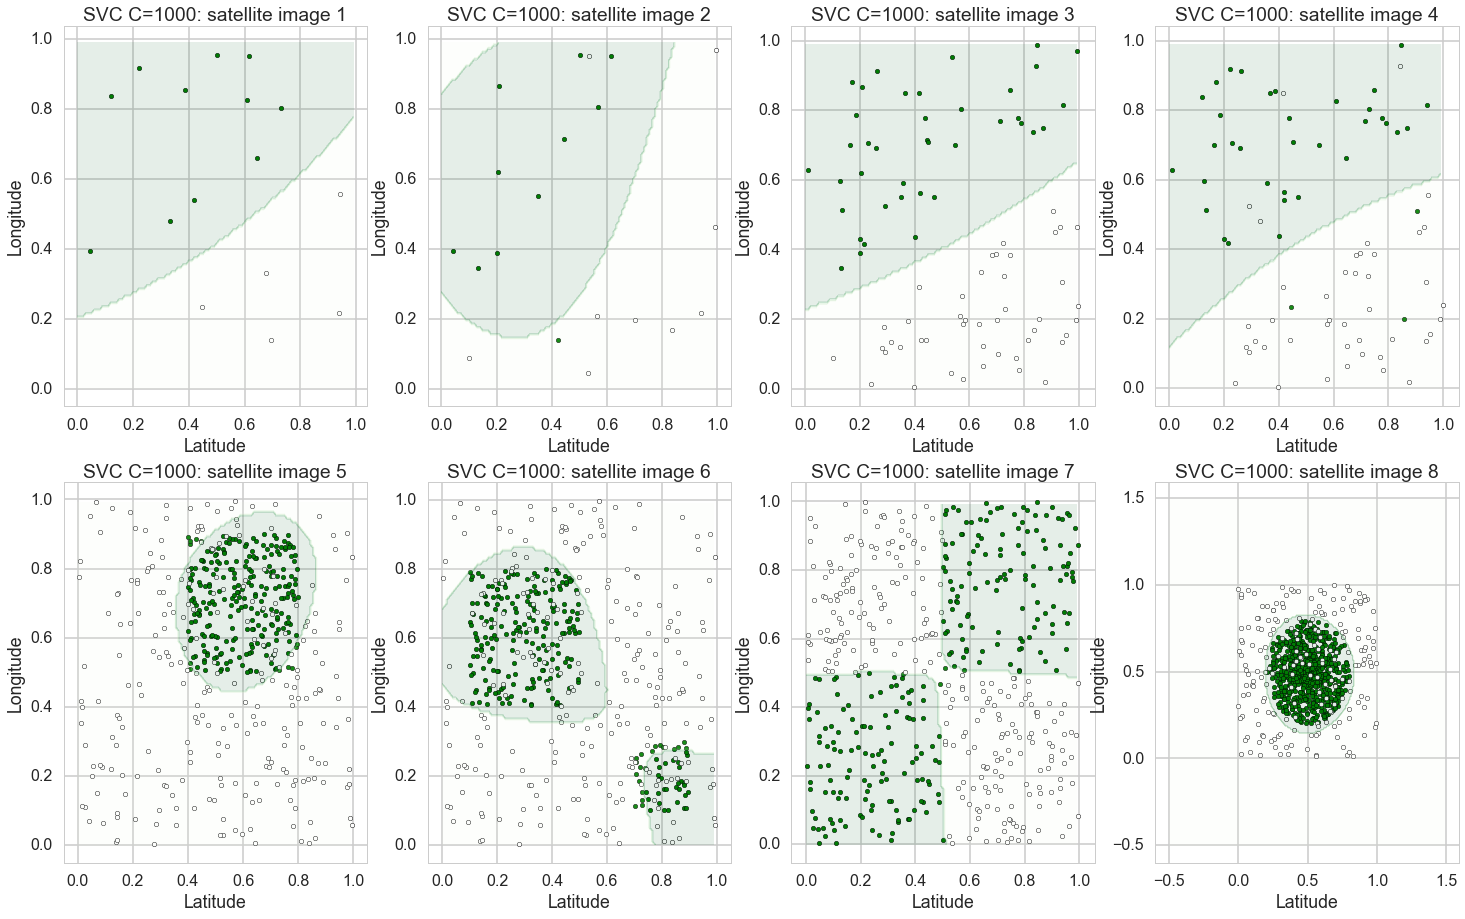

In [87]:
# rbf Kernel:
# --------------

#Plot the data in each dataframe as a subplot of a single figure
fig, ax5 = plt.subplots(2, 4, figsize=(25, 15))

#Create an svc model
svc2 = svm.SVC(C = 1000 , kernel = 'rbf')

#Iterate through all images/dataframes
for i in range(len(sat_images)):       
    
    # Adjust index
    if i > 3:
        m , n = 1 , i - 4
    else:
        m , n = 0 ,  i
        
    #Get the long/lat coords
    x = sat_images[i].values[:, :-1]
    
    #Get the class labels
    y = sat_images[i].values[:, -1]    
    
    #Fit our logistic regression model
    svc2.fit(x, y)
    
    #Change the bounds on the scatter plot (the 4th dataframe needs a larger frame)
    if i == 7:
        bounds = (-0.5, 1.5)
    else:
        bounds = (0, 1)
    
    #Plot the data along with the decision boundary learned by our model
    ax5[m , n] = plot_decision_boundary(x, y, svc2, 
                                   'SVC C=1000: satellite image {}'.format(i + 1), 
                                   ax5[m,n], bounds)
    

plt.show()


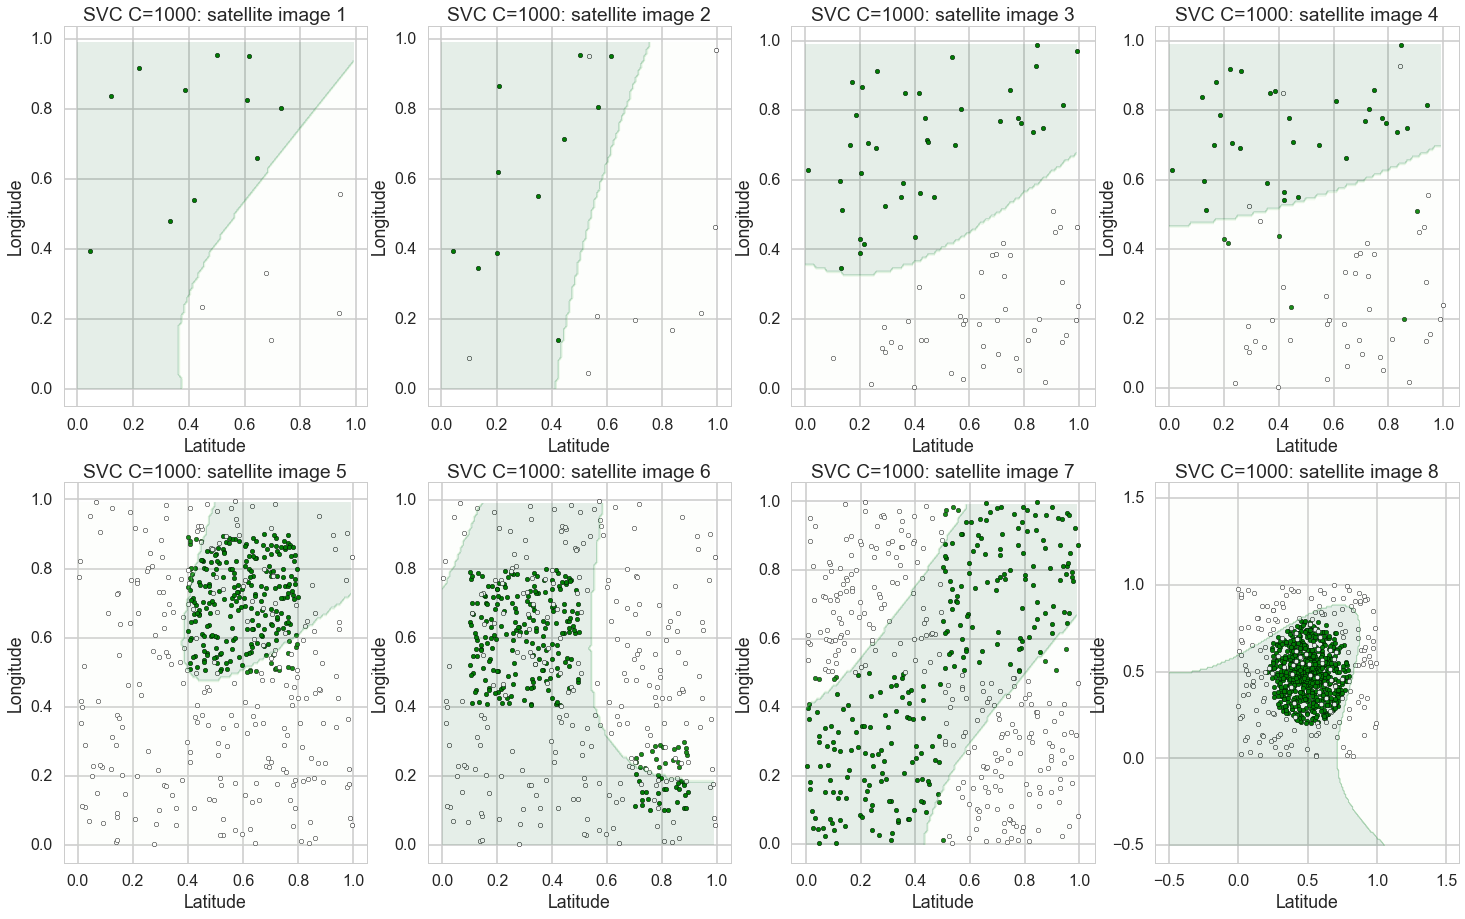

In [88]:
# poly Kernel:
# --------------

#Plot the data in each dataframe as a subplot of a single figure
fig, ax5 = plt.subplots(2, 4, figsize=(25, 15))

#Create an svc model
svc2 = svm.SVC(C = 1000 , kernel = 'poly')

#Iterate through all images/dataframes
for i in range(len(sat_images)):       
    
    # Adjust index
    if i > 3:
        m , n = 1 , i - 4
    else:
        m , n = 0 ,  i
        
    #Get the long/lat coords
    x = sat_images[i].values[:, :-1]
    
    #Get the class labels
    y = sat_images[i].values[:, -1]    
    
    #Fit our logistic regression model
    svc2.fit(x, y)
    
    #Change the bounds on the scatter plot (the 4th dataframe needs a larger frame)
    if i == 7:
        bounds = (-0.5, 1.5)
    else:
        bounds = (0, 1)
    
    #Plot the data along with the decision boundary learned by our model
    ax5[m , n] = plot_decision_boundary(x, y, svc2, 
                                   'SVC C=1000: satellite image {}'.format(i + 1), 
                                   ax5[m,n], bounds)
    

plt.show()


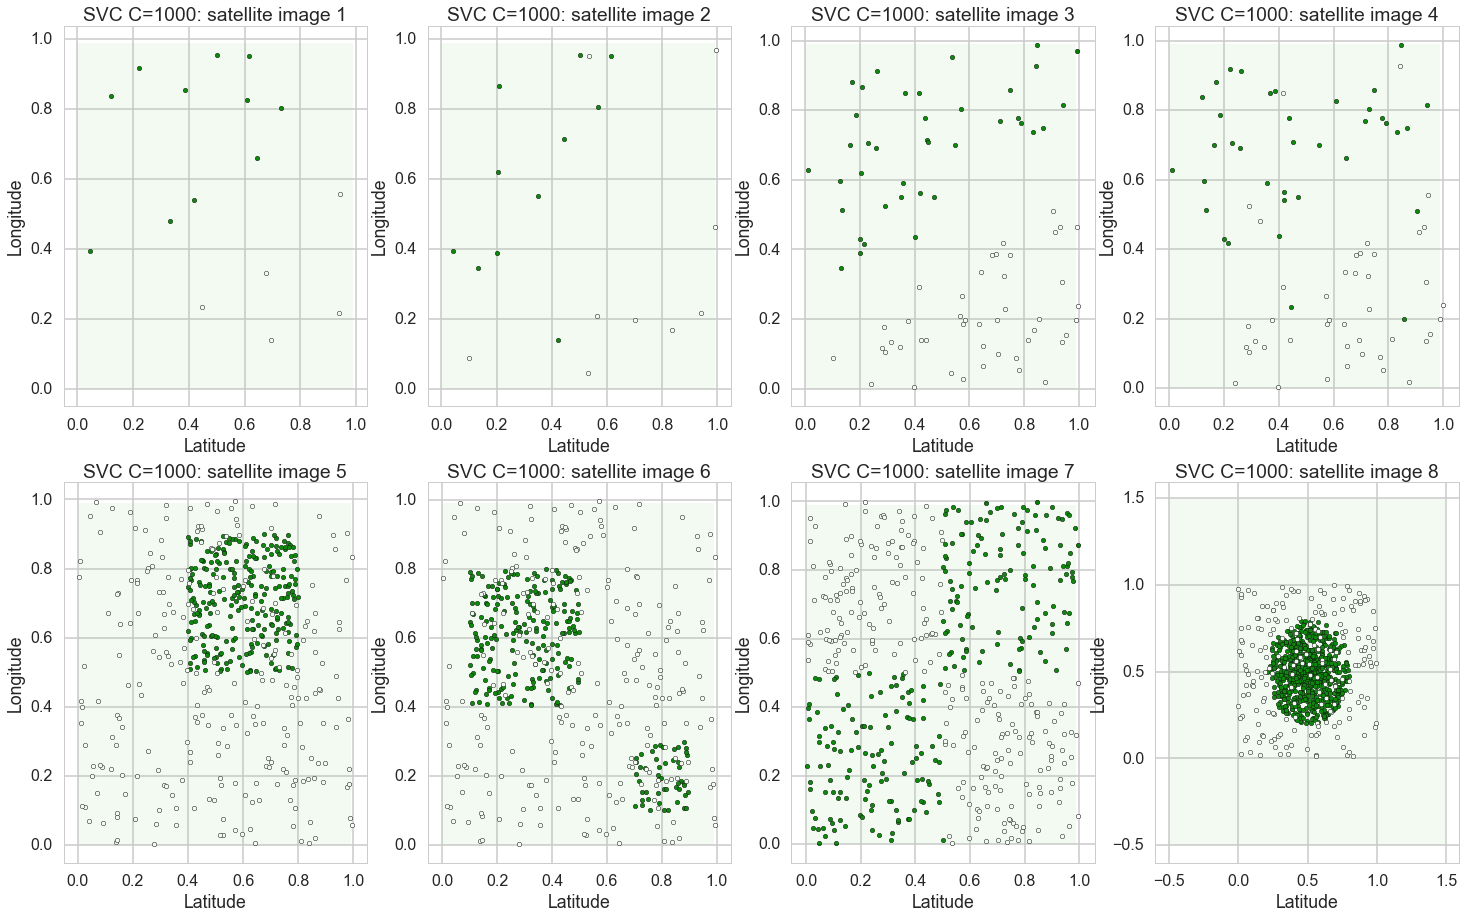

In [89]:
# sigmoid Kernel:
# --------------

#Plot the data in each dataframe as a subplot of a single figure
fig, ax5 = plt.subplots(2, 4, figsize=(25, 15))

#Create an svc model
svc2 = svm.SVC(C = 1000 , kernel = 'sigmoid')

#Iterate through all images/dataframes
for i in range(len(sat_images)):       
    
    # Adjust index
    if i > 3:
        m , n = 1 , i - 4
    else:
        m , n = 0 ,  i
        
    #Get the long/lat coords
    x = sat_images[i].values[:, :-1]
    
    #Get the class labels
    y = sat_images[i].values[:, -1]    
    
    #Fit our logistic regression model
    svc2.fit(x, y)
    
    #Change the bounds on the scatter plot (the 4th dataframe needs a larger frame)
    if i == 7:
        bounds = (-0.5, 1.5)
    else:
        bounds = (0, 1)
    
    #Plot the data along with the decision boundary learned by our model
    ax5[m , n] = plot_decision_boundary(x, y, svc2, 
                                   'SVC C=1000: satellite image {}'.format(i + 1), 
                                   ax5[m,n], bounds)
    

plt.show()


** Remarks:**

 - The non linear kernel produced a non linear decision boundary
 - It is obvious that the "rbf" kernel has the best performance close to the performance of the non linear classifier (quadratic forms of the linear and logistic regression, QDA, KNN and decision trees)
 
<br>

## Problem 2 (Optional): Classification Competition

This problem will involve an class-wide model building competition, where you will compete with each other in building a prediction model for cancer diagnosis. The results will be displayed live on a public leaderboard. The competition begins on Nov 9th, 3:00pm, and end on Nov 16th, 11:59pm. 

Please access the following link for all relevant details (data set, submission instructions, evaluation metric, leader board, etc.):
https://inclass.kaggle.com/c/harvard-data-science-course-competition

**Reward:** The top 20% of students on the leaderboard will each receive one bonus point to apply to an homework score of their choice (meaning you can turn a homework score of 2 to a 3, 3 to a 4, 5 to a 6 etc).

---

## Challenge Problem: Meta Learning

In the problem, you are provided with 10 different previously trained prediction models for a spam classification task. The task is to investigate how can one combine these models into a single meta classification model (without retraining the individual models) that performs better than each of the individual ones? 

The data for this problem is provided in the files `dataset_5_train.txt` and `dataset_5_test.txt`. Each row of these files is an email described by 57 attributes, and the last column is 1 if the email is spam, and 0 otherwise. 

The prediction models are provided in the file `models.npy` and can be loaded into an array by executing: 

`models = np.load('models.npy')`

As before, you can make predictions using the $i^\text{th}$ using:

`model[i].predict(x_test)` 

and score the model using:

`model[i].score(x_test, y_test)`

The baseline for this task is a simple combination strategy that takes a majority vote from the individual prediction models.

**Any reasonable model that performs better than the baseline model on the test set will receive full credit.**

There are many intuitive ways to combine these 10 models into one; a more sophisticated approach is called "mixture of experts". In this problem, we are not requiring you to implement any particular approach.

---